<h1>Lecture 9, November 3, 2025 </h1>

<h1> (G)ARCH Models</h1>

Marta Boczon 

Department of Economics

Copnehagen Business School

mbo.eco@cbs.dk

In [31]:
#install.packages("quantmod")
#install.packages("fredr")
#install.packages("ggfortify")
#install.packages('urca')
#install.packages("tseries")
#install.packages("forecast")
#install.packages("dynlm")
#install.packages("stargazer")
#install.packages("pracma")
#install.packages("dLagM")
#install.packages("gets")
#install.packages("car")
#install.packages("lmtest")
#install.packages("vars")
#install.packages("tseries")
#install.packages("strucchange")
#install.packages("graphics")
#install.packages("grDevices")
#install.packages("tsDyn")
#install.packages('fGarch')
#install.packages('aTSA')
options(warn=-1)

<div style="background-color:#e6f2ff; padding:15px; border-radius:5px;">

<h2>Roadmap</h2>

<p>Today we will learn about GARCH models.</p>

<p><strong>Goals for today:</strong></p>
<ul>
  <li>Test for ARCH effects.</li>
  <li>Estimate AR–GARCH models.</li>
</ul>

<p><strong>Expected outcomes:</strong></p>
<ul>
  <li>Understand the difference between conditional and unconditional moments.</li>
  <li>Interpret plots of squared series.</li>
  <li>Interpret ACF plots of squared series.</li>
  <li>Understand why squared residuals are more reliable to investigate than the series in levels.</li>
  <li>Understand the mechanics behind the Engle LM–ARCH test.</li>
  <li>Learn how to estimate an ARMA–GARCH(1,1) model.</li>
  <li>Learn how to forecast using an ARMA–GARCH(1,1) model.</li>
</ul>

<p>We will practice together using returns on Apple stock. To reinforce each new concept, we will conduct two in-class exercises using returns on BMW stock.</p>

</div>


<div style="background-color:#e6f2ff; padding:15px; border-radius:5px;">

<h2>Conditional and Unconditional Moments</h2>

<p>Let's start with a definition of volatility.</p>

<p><strong>What is volatility?</strong></p>

<p>Volatility is a measure of the variability of a time series (often a stock
return) over a certain period of time. This is often measured by the
standard deviation (or variance), but these are not identical. Both terms (variance and volatility) are often
understood in financial circles as measures (or approximations) of risk.</p>

<p><em>"In conventional econometric models, the variance of the disturbance term is assumed to be constant. However, as shown above, many economic time series exhibit periods of unusually large <strong>volatility</strong> followed by periods of relative <strong>tranquility</strong>. In such circumstances, the assumption of a constant variance (homoskedasticity) is inappropriate."</em> (Enders, p. 123)</p>

<p><strong>Volatility clusters</strong> refer to “bouts” of higher or lower volatility \(y_t\) and imply that a time series is conditionally heteroskedastic.</p>

<p>The first step in understanding ARCH and GARCH models is to understand the difference between conditional and unconditional moments. In short:
    
<p> <strong>Unconditional moments</strong> describe the overall properties of a variable—its mean or variance on average, without considering any information from the past.</p>

<p><strong>Conditional moments</strong> describe how those properties change depending on information available at a given time—typically, past values of the variable.Let us start with mean and variance.</p>

</div>



<div style="background-color:#e6f2ff; padding:15px; border-radius:6px; line-height:1.6;">
  <h3>Can the Plot of the Series Tell Us Whether the Unconditional Variance Is Constant?</h3>

  <p>The plot of the <strong>original series</strong> (e.g., returns) provides only a <em>visual impression</em> of volatility stability. 
  However, what we observe in the plot is actually a <strong>mix of conditional and unconditional variance behavior</strong>.</p>

<ul>
<li>If the amplitude of fluctuations looks roughly similar over time, this is <strong>consistent</strong> with a constant 
        unconditional variance — the long-run average volatility does not appear to change.</li>

<li>If there are visible clusters of large and small movements (periods of turbulence followed by calm), 
        this suggests that the <strong>conditional variance</strong> varies over time — even though the 
        <strong>unconditional variance</strong> (its long-run average) may remain constant.</li>
</ul>

  <p><strong>Why visual inspection is limited:</strong> 
  The unconditional variance is a long-run, theoretical property of a stationary process, defined as 
  <em>E[(r<sub>t</sub> − μ)<sup>2</sup>]</em>. 
  The plot of a finite sample reflects both short-run conditional dynamics (temporary bursts of volatility) 
  and this long-run average, so it cannot disentangle the two visually.</p>

  <p><strong>Conclusion:</strong> 
  The plot of the series shows a combination of <em>conditional</em> and <em>unconditional</em> variance patterns. 
  It can suggest volatility clustering or stability, but cannot establish whether the <em>unconditional variance</em> 
  is constant. Formal modeling (e.g., ARCH-LM test or GARCH estimation) is needed for that distinction.</p>
</div>


<div style="background-color:#e6f2ff; padding:15px; border-radius:6px; line-height:1.6;">
  <h3>Can the Plot of the Series Tell Us Whether the Mean Is Constant?</h3>

  <p>The plot of a time series can show fluctuations that look like the mean is changing over time. 
  However, these apparent shifts may reflect changes in the <strong>conditional mean</strong> rather than a true change in the 
  <strong>unconditional mean</strong>.</p>

  <ul>
    <li><strong>Unconditional mean:</strong> The long-run expected value of the process, 
        <em>E(y<sub>t</sub>)</em>, which remains constant for stationary series.</li>
    <li><strong>Conditional mean:</strong> The expected value of <em>y<sub>t</sub></em> given past information, 
        <em>E(y<sub>t</sub> | Ω<sub>t−1</sub>)</em>, which can change over time as past values evolve.</li>
  </ul>

  <p>For example, in an AR(1) model <em>y<sub>t</sub> = 0.8y<sub>t−1</sub> + ε<sub>t</sub></em>, 
  the conditional mean <em>E(y<sub>t</sub> | y<sub>t−1</sub>) = 0.8y<sub>t−1</sub></em> varies with time, 
  but the unconditional mean <em>E(y<sub>t</sub>) = 0</em> is constant. 
  The series may appear to drift around zero for long periods, giving the illusion of a changing mean even though it is stationary.</p>

  <p><strong>Conclusion:</strong> 
  The plot of the series can hint at mean stability, but apparent movements in the mean often reflect 
  <em>conditional dynamics</em> rather than non-stationarity. 
  A series can have a constant <em>unconditional mean</em> and still show time-varying <em>conditional means</em> 
  due to autoregressive structure or other short-run dependencies.</p>
</div>


<div style="background-color:#e6f2ff; padding:15px; border-radius:6px; line-height:1.5;">

  <h2 style="margin-top:0">AR(1) Process With Constant Conditional Variance</h2>

  <h3 style="margin-bottom:8px">Mean of AR(1) Process</h3>

  <p><strong>Model:</strong> $y_t = a_0 + a_1 y_{t-1} + \epsilon_t$</p>

  <p><strong>Properties of $\epsilon_t$</strong></p>
  <ol>
    <li><strong>White noise:</strong> $\mathbb{E}(\epsilon_t)=0$, $\mathbb{Var}(\epsilon_t)=\sigma^2$.</li>
    <li><strong>Independence:</strong> $\epsilon_t$ is independent over time and of $\Omega_{t-1}$, so  
      $$\mathbb{E}(\epsilon_t\mid\Omega_{t-1})=\mathbb{E}(\epsilon_t)=0.$$
    </li>
  </ol>

  <h4>Unconditional Mean</h4>
  <p>
    $\mathbb{E}(y_t)=\mathbb{E}\!\left(a_0+a_1 y_{t-1}+\epsilon_t\right)=a_0+a_1\,\mathbb{E}(y_{t-1}).$
    Since $\mathbb{E}(y_t)=\mathbb{E}(y_{t-1})$, we get:
  </p>

  <p style="color:#cc0066; font-weight:bold; text-align:center;">
    $$\mathbb{E}(y_t)=\frac{a_0}{1-a_1}, \quad |a_1|<1.$$
  </p>

  <h4>Conditional Mean</h4>
  <p>
    $$\mathbb{E}(y_t\mid\Omega_{t-1})
    = \mathbb{E}\!\left(a_0+a_1 y_{t-1}+\epsilon_t \mid \Omega_{t-1}\right)
    = a_0 + a_1 y_{t-1}.$$
  </p>

  <h3>Variance of AR(1) Process</h3>

  <p><strong>Model:</strong> $y_t = a_0 + a_1 y_{t-1} + \epsilon_t$</p>

  <p><strong>Key Properties of $\epsilon_t$</strong></p>
  <ol>
    <li><strong>White noise:</strong> $\mathbb{E}(\epsilon_t)=0$, $\mathbb{Var}(\epsilon_t)=\sigma^2$.</li>
    <li><strong>Independence:</strong> $\epsilon_t$ independent of $\Omega_{t-1}$, so  
      $$\mathbb{E}(\epsilon_t\mid\Omega_{t-1})=0.$$
    </li>
  </ol>

  <h4>Unconditional Variance</h4>
  <p>
    $$\mathbb{Var}(y_t) = \mathbb{Var}(a_0 + a_1 y_{t-1} + \epsilon_t)
    = a_1^2\,\mathbb{Var}(y_{t-1}) + \sigma^2.$$
    For a covariance-stationary process, $\mathbb{Var}(y_t)=\mathbb{Var}(y_{t-1})=\gamma_0$, so:
  </p>

  <p>
    $$\gamma_0 = a_1^2 \gamma_0 + \sigma^2
    \;\Rightarrow\;
    \gamma_0 = \frac{\sigma^2}{1-a_1^2}, \quad |a_1|<1.$$
  </p>

  <p style="color:#cc0066; font-weight:bold; text-align:center;">
    $$\mathbb{Var}(y_t)=\frac{\sigma^2}{1-a_1^2}.$$
  </p>

  <h4>Conditional Variance</h4>
  <p>
    Given $\Omega_{t-1}$, $a_0$ and $a_1 y_{t-1}$ are known, so variability comes only from $\epsilon_t$:
    $$\mathbb{Var}(y_t\mid\Omega_{t-1})=\mathbb{Var}(\epsilon_t\mid\Omega_{t-1})=\sigma^2.$$
  </p>

  <p style="color:#cc0066; font-weight:bold; text-align:center;">
    $$\mathbb{Var}(y_t\mid\Omega_{t-1}) = \sigma^2.$$
  </p>

  <h4>Summary</h4>
  <ul>
    <li><strong>Unconditional variance:</strong> <span style="color:#cc0066; font-weight:bold;">$\mathbb{Var}(y_t)=\dfrac{\sigma^2}{1-a_1^2}$</span> (requires $|a_1|<1$).</li>
    <li><strong>Conditional variance:</strong> <span style="color:#cc0066; font-weight:bold;">$\mathbb{Var}(y_t\mid\Omega_{t-1})=\sigma^2$</span> (constant, by assumption).</li>
  </ul>

</div>


    

<div style="background-color:#e6f2ff; padding:15px; border-radius:6px; line-height:1.5;">

  <h2 style="margin-top:0">AR(1) Process With Varying Conditional Variance Modeled by ARCH(1)</h2>

  <p><strong>Idea:</strong>  
  Let us allow the variance of $\epsilon_t$ to vary when conditioning on the information set $\Omega_{t-1}$. Specifically, we model $\epsilon_t$ as a <em>multiplicative conditionally heteroskedastic process</em> given by:</p>

  <p>
  $$y_t = a_0 + a_1 y_{t-1} + \epsilon_t$$  
  $$\epsilon_t = v_t \sqrt{\omega_0 + \alpha_1 \epsilon_{t-1}^2},$$  
  where $v_t$ is standardized white noise with $\mathbb{Var}(v_t)=1$.
  </p>

  <p><strong>Key Properties of $\epsilon_t$</strong></p>
  <ol>
    <li><strong>White Noise:</strong> By definition, $\epsilon_t$ has $\mathbb{E}(\epsilon_t)=0$ and $\mathbb{Var}(\epsilon_t)=\sigma^2$.</li>
  </ol>

  <h4>Unconditional Variance</h4>

  <p><strong>Step 1:</strong></p>
  <p>
  $$\mathbb{Var}(y_t)=\mathbb{Var}(a_0+a_1y_{t-1}+\epsilon_t)
  =a_1^2\mathbb{Var}(y_{t-1})+\mathbb{Var}(\epsilon_t)
  +2a_1\underbrace{\mathbb{Cov}(y_{t-1},\epsilon_t)}_{=0}.$$
  </p>

  <p>Hence,</p>
  <p style="color:#cc0066; font-weight:bold; text-align:center;">
    $$\mathbb{Var}(y_t) = \frac{\mathbb{Var}(\epsilon_t)}{1 - a_1^2}.$$
  </p>

  <p><strong>Step 2:</strong></p>
  <p>
  $$\mathbb{Var}(\epsilon_t) = \mathbb{E}(\epsilon_t^2) - [\mathbb{E}(\epsilon_t)]^2 = \mathbb{E}(\epsilon_t^2).$$
  </p>

  <p><strong>Step 3:</strong></p>
  <p>
  $$\mathbb{E}(\epsilon_t^2)
  = \mathbb{E}(v_t^2) \times \mathbb{E}(\omega_0 + \alpha_1 \epsilon_{t-1}^2)
  = \omega_0 + \alpha_1 \mathbb{E}(\epsilon_{t-1}^2).$$
  </p>

  <p>Solving for the steady-state value gives:</p>
  <p style="color:#cc0066; font-weight:bold; text-align:center;">
    $$\mathbb{E}(\epsilon_t^2) = \frac{\omega_0}{1 - \alpha_1}.$$
  </p>

  <p><strong>Hence,</strong></p>
  <p style="color:#cc0066; font-weight:bold; text-align:center;">
    $$\mathbb{Var}(y_t) = \frac{\omega_0}{(1 - a_1^2)(1 - \alpha_1)}.$$
  </p>

  <h4>Conditional Variance</h4>

  <p><strong>Step 1:</strong></p>
  <p>
  $$y_t = a_0 + a_1 y_{t-1} + \epsilon_t$$  
  Thus,
  $$\mathbb{Var}(y_t\mid\Omega_{t-1})
  = \mathbb{Var}(a_0 + a_1 y_{t-1} + \epsilon_t \mid \Omega_{t-1})
  = \mathbb{Var}(\epsilon_t \mid \Omega_{t-1}).$$
  </p>

  <p><strong>Step 2:</strong></p>
  <p>
  $$\mathbb{Var}(\epsilon_t \mid \Omega_{t-1})
  = \mathbb{E}(\epsilon_t^2 \mid \Omega_{t-1})
  - [\mathbb{E}(\epsilon_t \mid \Omega_{t-1})]^2.$$
  </p>

  <p>Using $\epsilon_t = v_t \sqrt{\omega_0 + \alpha_1 \epsilon_{t-1}^2}$, we get:</p>
  <p>
  $$\mathbb{Var}(\epsilon_t \mid \Omega_{t-1})
  = \mathbb{E}(v_t^2 (\omega_0 + \alpha_1 \epsilon_{t-1}^2) \mid \Omega_{t-1})
  - \mathbb{E}\!\left(v_t \sqrt{\omega_0 + \alpha_1 \epsilon_{t-1}^2} \mid \Omega_{t-1}\right)^2.$$
  </p>

  <p><strong>Hence,</strong></p>
  <p style="color:#cc0066; font-weight:bold; text-align:center;">
    $$\mathbb{Var}(\epsilon_t \mid \Omega_{t-1}) = \omega_0 + \alpha_1 \epsilon_{t-1}^2.$$
  </p>

</div>



<div style="background-color:#e6f2ff; padding:15px; border-radius:6px; line-height:1.5;">

  <h2 style="margin-top:0">AR(2)-ARCH(2) Model</h2>

  <p>
    $$
    y_t = a_0 + a_1 y_{t-1} + a_2 y_{t-2} + \epsilon_t
    $$
    $$
    \epsilon_t = v_t \sqrt{\omega_0 + \alpha_1 \epsilon_{t-1}^2 + \alpha_2 \epsilon_{t-2}^2},
    $$
    where $v_t$ is standardized white noise with $\mathbb{Var}(v_t)=1$ and is independent of $\epsilon_t$ at all leads and lags.
  </p>

  <h4>Unconditional Variance</h4>

  <p><strong>Step 1:</strong></p>
  <p>
    $$
    \mathbb{Var}(y_t) = \mathbb{Var}(a_0 + a_1 y_{t-1} + a_2 y_{t-2} + \epsilon_t)
    $$
    $$
    = a_1^2 \mathbb{Var}(y_{t-1}) + a_2^2 \mathbb{Var}(y_{t-2}) + \mathbb{Var}(\epsilon_t)
    + 2a_1 \underbrace{\mathbb{Cov}(y_{t-1}, \epsilon_t)}_{=0}
    + 2a_2 \underbrace{\mathbb{Cov}(y_{t-2}, \epsilon_t)}_{=0}
    + 2a_1 a_2 \mathbb{Cov}(y_{t-1}, y_{t-2}).
    $$
  </p>

  <p>
    Using $\mathbb{Cov}(y_{t-1}, y_{t-2}) = \dfrac{a_1 \mathbb{Var}(y_t)}{1 - a_2}$, we get:
  </p>

  <p style="color:#cc0066; font-weight:bold; text-align:center;">
    $$\mathbb{Var}(y_t) = \frac{\mathbb{Var}(\epsilon_t)}{1 - a_1^2 - a_2^2 - \frac{2a_1^2 a_2}{1 - a_2}}.$$
  </p>

  <p><strong>Note:</strong> For an AR(2) process, $\mathbb{Cov}(y_{t-1}, y_{t-2}) = \gamma_1$ and it can be shown that  
  $\gamma_1 = a_1 \mathbb{Var}(y_t) + a_2 \gamma_1 \Rightarrow \gamma_1 = \dfrac{a_1 \mathbb{Var}(y_t)}{1 - a_2}.$</p>

  <p><strong>Step 2:</strong></p>
  <p>
    $$\mathbb{Var}(\epsilon_t) = \mathbb{E}(\epsilon_t^2) - [\mathbb{E}(\epsilon_t)]^2 = \mathbb{E}(\epsilon_t^2).$$
  </p>

  <p><strong>Step 3:</strong></p>
  <p>
    $$
    \mathbb{E}(\epsilon_t^2) = \mathbb{E}(v_t^2) \times \mathbb{E}(\omega_0 + \alpha_1 \epsilon_{t-1}^2 + \alpha_2 \epsilon_{t-2}^2)
    = \omega_0 + \alpha_1 \mathbb{E}(\epsilon_{t-1}^2) + \alpha_2 \mathbb{E}(\epsilon_{t-2}^2).
    $$
  </p>

  <p>In steady state:</p>
  <p style="color:#cc0066; font-weight:bold; text-align:center;">
    $$\mathbb{E}(\epsilon_t^2) = \frac{\omega_0}{1 - \alpha_1 - \alpha_2}.$$
  </p>

  <p><strong>Hence,</strong></p>
  <p style="color:#cc0066; font-weight:bold; text-align:center;">
    $$\mathbb{Var}(y_t) = \frac{\omega_0}{(1 - \alpha_1 - \alpha_2)\left(1 - a_1^2 - a_2^2 - \frac{2a_1^2 a_2}{1 - a_2}\right)}.$$
  </p>

  <h4>Conditional Variance</h4>

  <p><strong>Step 1:</strong></p>
  <p>
    $$y_t = a_0 + a_1 y_{t-1} + a_2 y_{t-2} + \epsilon_t.$$
    Therefore,
    $$\mathbb{Var}(y_t \mid \Omega_{t-1}) = \mathbb{Var}(\epsilon_t \mid \Omega_{t-1}).$$
  </p>

  <p><strong>Step 2:</strong></p>
  <p>
    $$\mathbb{Var}(\epsilon_t \mid \Omega_{t-1}) = \mathbb{E}(\epsilon_t^2 \mid \Omega_{t-1}) - [\mathbb{E}(\epsilon_t \mid \Omega_{t-1})]^2.$$
  </p>

  <p>
    Using $\epsilon_t = v_t \sqrt{\omega_0 + \alpha_1 \epsilon_{t-1}^2 + \alpha_2 \epsilon_{t-2}^2}$, we have:
  </p>

  <p>
    $$\mathbb{Var}(\epsilon_t \mid \Omega_{t-1})
    = \mathbb{E}(v_t^2(\omega_0 + \alpha_1 \epsilon_{t-1}^2 + \alpha_2 \epsilon_{t-2}^2) \mid \Omega_{t-1})
    - \mathbb{E}\!\left(v_t \sqrt{\omega_0 + \alpha_1 \epsilon_{t-1}^2 + \alpha_2 \epsilon_{t-2}^2} \mid \Omega_{t-1}\right)^2.$$
  </p>

  <p><strong>Hence,</strong></p>
  <p style="color:#cc0066; font-weight:bold; text-align:center;">
    $$\mathbb{Var}(\epsilon_t \mid \Omega_{t-1}) = \omega_0 + \alpha_1 \epsilon_{t-1}^2 + \alpha_2 \epsilon_{t-2}^2.$$
  </p>

</div>


<div style="background-color:#e6f2ff; padding:15px; border-radius:6px; line-height:1.5;">

  <h2 style="margin-top:0">AR($p$)-ARCH($k$) Model</h2>

  <p>
    The AR($p$)-ARCH($k$) model combines an autoregressive process for the mean with an autoregressive conditional heteroskedastic process for the variance:
  </p>

  <p>
    $$y_t = a_0 + \sum_{i=1}^p a_i y_{t-i} + \epsilon_t$$  
    $$\epsilon_t = v_t \sqrt{\omega_0 + \sum_{j=1}^k \alpha_j \epsilon_{t-j}^2},$$  
    where $v_t$ is standardized white noise with $\mathbb{Var}(v_t) = 1$ and is independent of $\epsilon_t$ at all leads and lags.
  </p>

  <h4>Stationarity Condition for ARCH Models</h4>

  <p>
    For an ARCH($k$) model to have a well-defined (finite) unconditional variance, the sum of the $\alpha$ coefficients—representing the influence of past squared errors—must be less than 1:
  </p>

  <p style="color:#cc0066; font-weight:bold; text-align:center;">
    $$\sum_{j=1}^k \alpha_j < 1.$$
  </p>

  <p>
    If this condition holds, the unconditional (long-run) variance exists and is finite:
  </p>

  <p style="color:#cc0066; font-weight:bold; text-align:center;">
    $$\mathbb{E}(\epsilon_t^2) = \frac{\omega_0}{1 - \sum_{j=1}^k \alpha_j}.$$
  </p>

  <p>
    However, if 
    <span style="color:#cc0066; font-weight:bold;">$\sum_{j=1}^k \alpha_j \ge 1$</span>,
    the unconditional variance becomes infinite—implying that shocks to volatility persist indefinitely, and the process is non-stationary in variance.
  </p>

</div>


<div style="background-color:#e6f2ff; padding:15px; border-radius:6px; line-height:1.5;">

  <h2 style="margin-top:0">AR($p$)-GARCH($k$) Models</h2>

  <p>
    When the number of lags in an ARCH model becomes too high, we can reformulate it into a more
    parsimonious structure that still captures <strong>volatility clustering</strong> effectively.
    This leads to the <strong>Generalized ARCH (GARCH)</strong> model:
  </p>

  <p style="color:#cc0066; font-weight:bold; text-align:center;">
    $$
    \epsilon_t = v_t \sqrt{
      \omega_0
      + \sum_{i=1}^q \alpha_i \epsilon_{t-i}^2
      + \sum_{i=1}^p \beta_i \mathbb{E}\!\left(\epsilon_{t-i}^2 \mid \Omega_{t-i-1}\right)
    }.
    $$
  </p>

  <p>
    where:
    <ul>
      <li>$v_t$ is standardized white noise with $\mathbb{Var}(v_t) = 1$,</li>
      <li>$\alpha_i$ measures the impact of past squared shocks (ARCH terms),</li>
      <li>$\beta_i$ measures the persistence of past conditional variances (GARCH terms).</li>
    </ul>
  </p>

  <h4>Why Use GARCH Instead of High-Order ARCH?</h4>

  <p>
    In practice, only lower-order models — particularly <strong>GARCH(1,1)</strong> — are commonly used,
    as they capture volatility clustering remarkably well with very few parameters.
  </p>

  <p>
    Interestingly, it can be shown that a <strong>GARCH(1,1)</strong> model is equivalent to an
    <strong>ARCH($p \rightarrow \infty$)</strong> model.
    This insight explains why we typically use GARCH when the order $p$ in an ARCH($p$)
    specification becomes large — it provides the same flexibility with far fewer parameters.
  </p>

</div>


<div style="background-color:#e6f2ff; padding:15px; border-radius:6px; line-height:1.5;">

<h2>Empirical Example</h2>

<p>
In the following section, we will demonstrate how to test for ARCH effects and estimate ARCH/GARCH models. 
Before proceeding, we first need to download data on stock returns for Apple and BMW and verify that the series are stationary.
</p>
</div>

In [32]:
# Load required libraries
library(quantmod)   # For financial data import and analysis
library(fGarch)     # For GARCH modeling
library(forecast)   # For time series forecasting

# Get stock price data for Apple (AAPL) from Yahoo Finance
# Reference: https://www.rdocumentation.org/packages/quantmod/versions/0.4.26/topics/getSymbols
apple = getSymbols("AAPL",
                   src = "yahoo",         # Data source
                   from = "2000-01-01",   # Start date
                   to   = "2025-11-01",   # End date
                   auto.assign = FALSE)   # Return data directly instead of saving to environment

# Extract the closing price column
apple = apple$AAPL.Close

# Display the first few observations
head(apple)

# Display the last few observations
tail(apple)

           AAPL.Close
2000-01-03   0.999442
2000-01-04   0.915179
2000-01-05   0.928571
2000-01-06   0.848214
2000-01-07   0.888393
2000-01-10   0.872768

           AAPL.Close
2025-10-24     262.82
2025-10-27     268.81
2025-10-28     269.00
2025-10-29     269.70
2025-10-30     271.40
2025-10-31     270.37

In [33]:
# Load required libraries
library(quantmod)   # For financial data import and analysis
library(fGarch)     # For GARCH modeling
library(forecast)   # For time series forecasting

# Get stock price data for BMW (BMW.DE) from Yahoo Finance
# Reference: https://www.rdocumentation.org/packages/quantmod/versions/0.4.26/topics/getSymbols
bmw = getSymbols("BMW.DE",
                   src = "yahoo",         # Data source
                   from = "2000-01-01",   # Start date
                   to   = "2025-11-01",   # End date
                   auto.assign = FALSE)   # Return data directly instead of saving to environment

# Extract the closing price column
bmw = bmw$BMW.DE.Close

# Display the first few observations
head(bmw)

# Display the last few observations
tail(bmw)

           BMW.DE.Close
2000-01-03        29.49
2000-01-04        28.30
2000-01-05        27.74
2000-01-06        27.65
2000-01-07        27.60
2000-01-10        28.70

           BMW.DE.Close
2025-10-24        81.16
2025-10-27        81.52
2025-10-28        81.24
2025-10-29        82.10
2025-10-30        81.38
2025-10-31        80.72

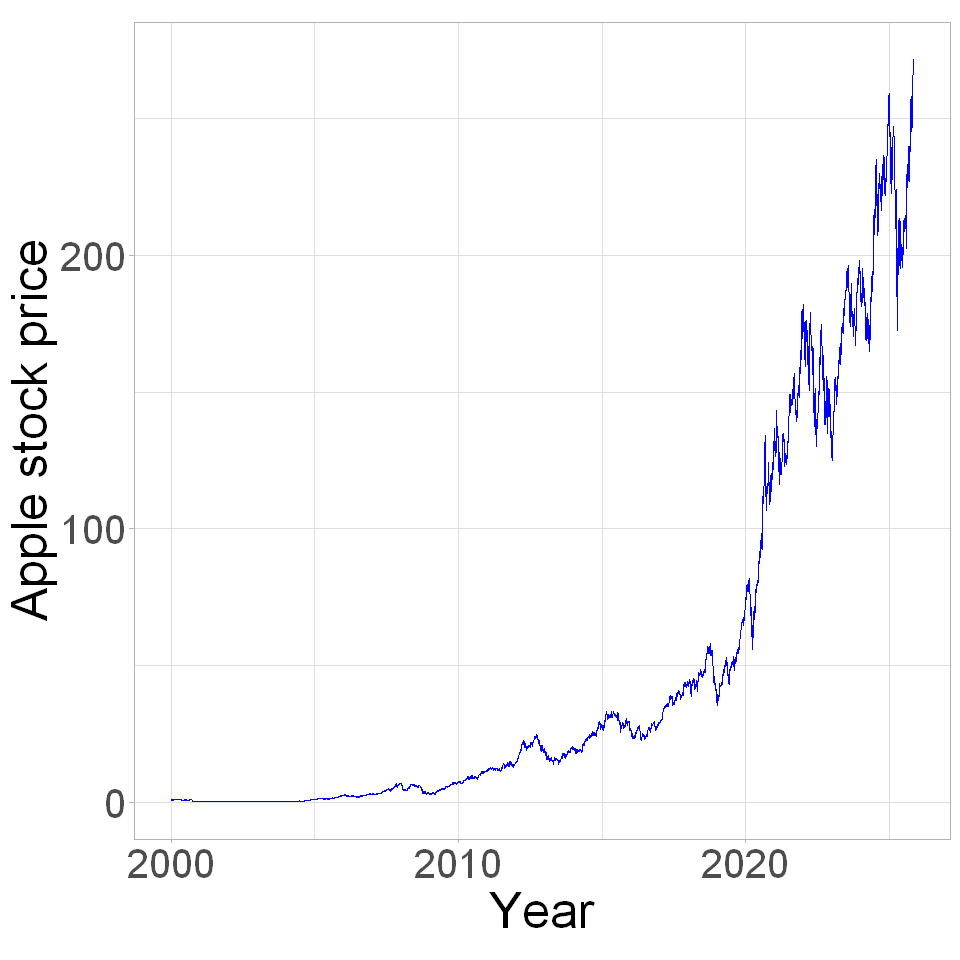

In [34]:
library(ggplot2)
library(ggfortify)
options(repr.plot.width=8, repr.plot.height=8)
fig = autoplot(apple, colour = 'blue')
fig = fig + theme(aspect.ratio=1) +
theme_light() +
theme(aspect.ratio=1) +
theme(plot.margin = ggplot2::margin(0.2, 0.2, 0.2, 0.2, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Year") +
labs(y = "Apple stock price")
fig

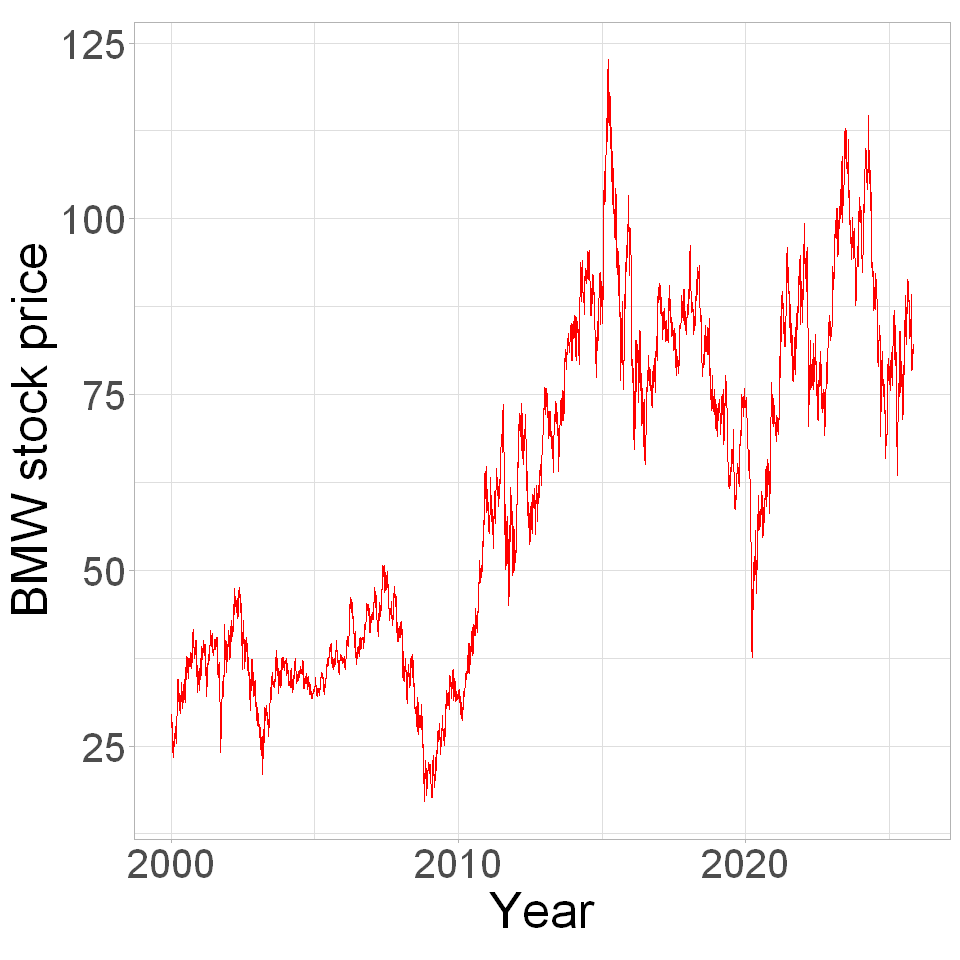

In [35]:
library(ggplot2)
library(ggfortify)
options(repr.plot.width=8, repr.plot.height=8)
fig = autoplot(bmw, colour = 'red')
fig = fig + theme(aspect.ratio=1) +
theme_light() +
theme(aspect.ratio=1) +
theme(plot.margin = ggplot2::margin(0.2, 0.2, 0.2, 0.2, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Year") +
labs(y = "BMW stock price")
fig

In [36]:
dapple = diff(log(apple))  # Compute log returns (difference in log prices)
head(dapple)               # Show first few log returns
tail(dapple)               # Show last few log returns
dapple = na.omit(dapple)   # Remove missing values (from first difference)

            AAPL.Close
2000-01-03          NA
2000-01-04 -0.08807741
2000-01-05  0.01452714
2000-01-06 -0.09051390
2000-01-07  0.04628127
2000-01-10 -0.01774444

              AAPL.Close
2025-10-24  0.0124045266
2025-10-27  0.0225353862
2025-10-28  0.0007065783
2025-10-29  0.0025988958
2025-10-30  0.0062834495
2025-10-31 -0.0038023517

In [37]:
dbmw = diff(log(bmw))  # Compute log returns (difference in log prices)
head(dbmw)             # Show first few log returns
tail(dbmw)             # Show last few log returns
dbmw = na.omit(dbmw)   # Remove missing values (from first difference)

           BMW.DE.Close
2000-01-03           NA
2000-01-04 -0.041189437
2000-01-05 -0.019986371
2000-01-06 -0.003249692
2000-01-07 -0.001809928
2000-01-10  0.039081363

           BMW.DE.Close
2025-10-24  0.009657205
2025-10-27  0.004425788
2025-10-28 -0.003440637
2025-10-29  0.010530287
2025-10-30 -0.008808489
2025-10-31 -0.008143118

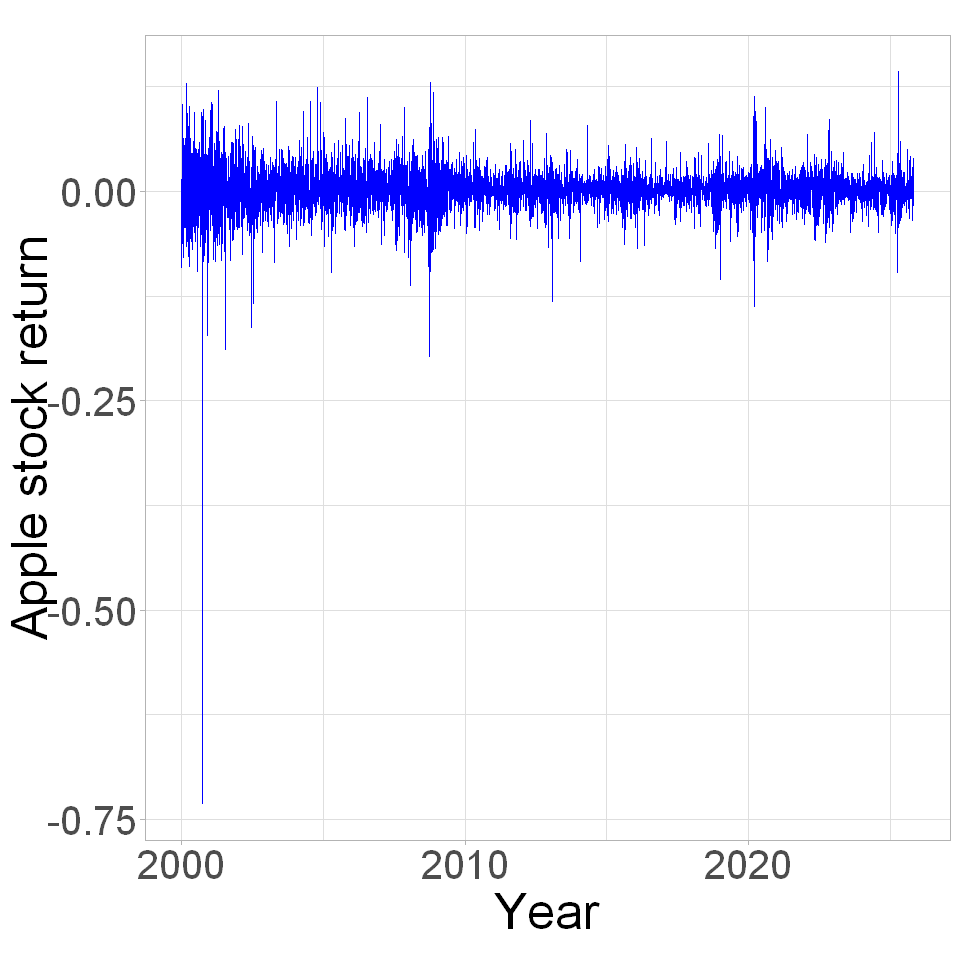

In [38]:
library(ggplot2)
library(ggfortify)
options(repr.plot.width=8, repr.plot.height=8)
fig = autoplot(dapple, colour = 'blue')
fig = fig + theme(aspect.ratio=1) +
theme_light() +
theme(aspect.ratio=1) +
theme(plot.margin = ggplot2::margin(0.2, 0.2, 0.2, 0.2, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Year") +
labs(y = "Apple stock return")
fig

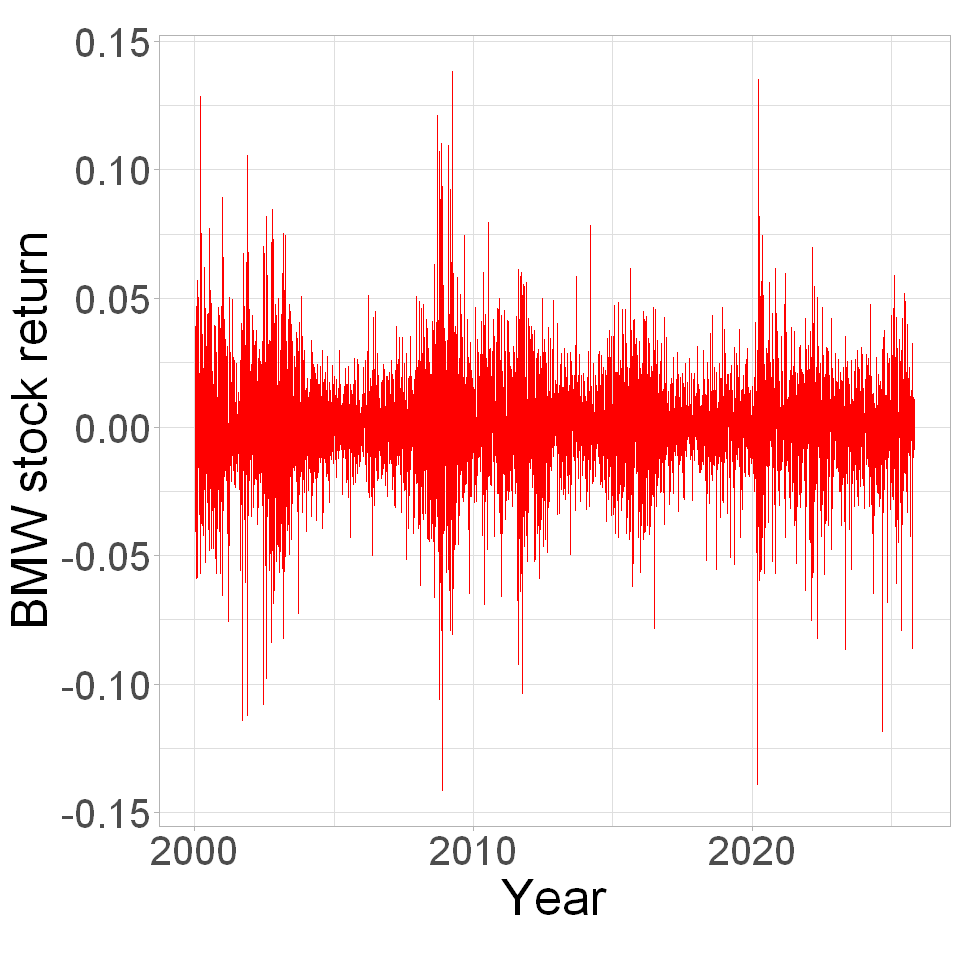

In [39]:
library(ggplot2)
library(ggfortify)
options(repr.plot.width=8, repr.plot.height=8)
fig = autoplot(dbmw, colour = 'red')
fig = fig + theme(aspect.ratio=1) +
theme_light() +
theme(aspect.ratio=1) +
theme(plot.margin = ggplot2::margin(0.2, 0.2, 0.2, 0.2, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Year") +
labs(y = "BMW stock return")
fig

In [40]:
library(urca)
summary(ur.df(dapple, type='trend', lags=8, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72856 -0.01061 -0.00007  0.01152  0.14123 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.969e-04  6.228e-04   0.958  0.33787    
z.lag.1     -9.754e-01  3.540e-02 -27.552  < 2e-16 ***
tt           8.049e-08  1.658e-07   0.485  0.62750    
z.diff.lag1 -6.046e-02  3.334e-02  -1.813  0.06982 .  
z.diff.lag2 -6.050e-02  3.102e-02  -1.951  0.05113 .  
z.diff.lag3 -7.391e-02  2.846e-02  -2.597  0.00941 ** 
z.diff.lag4 -3.621e-02  2.556e-02  -1.417  0.15661    
z.diff.lag5 -1.820e-02  2.199e-02  -0.828  0.40785    
z.diff.lag6 -7.792e-03  1.783e-02  -0.437  0.66218    
z.diff.lag7  1.801e-02  1.238e-02   1.455  0.14572    
---
Signif. codes:  0 '***' 0.001 '**' 0.01

<div style="background-color:lightyellow; padding:15px; border-radius:5px;">
  <h3>Interpretation of the Unit Root Test</h3>
  <p><strong>Key results:</strong> τ<sub>3</sub> = −27.5522; φ<sub>2</sub> = 253.0426; φ<sub>3</sub> = 379.5638</p>
  <ul>
    <li><strong>τ<sub>3</sub> (unit root):</strong> Far below the 1% critical value ⇒ <strong>reject</strong> the null of a unit root. The process is not I(1).</li>
    <li><strong>φ<sub>2</sub> and φ<sub>3</sub> (deterministic terms):</strong> Both exceed their 1% critical values ⇒ <strong>reject</strong> that the deterministic components are zero.</li>
  </ul>
  <p><strong>Conclusion:</strong> The series is <strong>trend-stationary</strong>: stationary <em>around</em> a deterministic component (intercept and linear trend).</p>
</div>



In [41]:
t = 1:length(dapple)
model.dapple = lm(dapple ~ t)

library(stargazer)
stargazer(model.dapple, type = "text")
# The returns are stationary.


                        Dependent variable:    
                    ---------------------------
                              dapple           
-----------------------------------------------
t                             0.00000          
                             (0.00000)         
                                               
Constant                       0.001           
                              (0.001)          
                                               
-----------------------------------------------
Observations                   6,497           
R2                            0.0001           
Adjusted R2                   -0.0001          
Residual Std. Error      0.025 (df = 6495)     
F Statistic            0.352 (df = 1; 6495)    
Note:               *p<0.1; **p<0.05; ***p<0.01


<div style="background-color:lightyellow; padding:15px; border-radius:5px;">
  <h3>Interpretation of the Trend Regression</h3>
  <p><strong>Model:</strong> dapple = α + βt + ε</p>
  <ul>
    <li>The estimated trend coefficient (β) is approximately <strong>0.00000</strong>.</li>
    <li>The coefficient is <strong>not statistically significant</strong> (p-value &gt; 0.1).</li>
    <li>This means there is <strong>no significant deterministic trend</strong> in the return series.</li>
  </ul>
  <p><strong>Conclusion:</strong> The stock returns are <strong>stationary</strong> with no deterministic trend to remove. 
  The mean of returns remains constant over time, and any fluctuations are random rather than systematic.</p>
</div>


In [42]:
library(urca)
summary(ur.df(dbmw, type='trend', lags=8, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.141485 -0.009794 -0.000075  0.010168  0.138011 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.272e-04  5.027e-04   0.651   0.5152    
z.lag.1     -1.016e+00  1.732e-02 -58.645   <2e-16 ***
tt          -4.832e-08  1.318e-07  -0.367   0.7139    
z.diff.lag   2.655e-02  1.231e-02   2.157   0.0311 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02037 on 6591 degrees of freedom
Multiple R-squared:  0.4951,	Adjusted R-squared:  0.4949 
F-statistic:  2154 on 3 and 6591 DF,  p-value: < 2.2e-16


Value of test-statistic is: -58.6455 1146.431 1719.646 

Critical values for test statistics: 
      1pct  5pct 10pct


<div style="background-color:lightyellow; padding:15px; border-radius:5px;">
  <h3>Interpretation of the Unit Root Test</h3>
  <p><strong>Key results:</strong> τ<sub>3</sub> = −58.6455; φ<sub>2</sub> = 1146.431; φ<sub>3</sub> = 1719.646</p>
  <ul>
    <li><strong>τ<sub>3</sub> (unit root):</strong> Much smaller (more negative) than the 1% critical value (−3.96) ⇒ <strong>reject</strong> the null of a unit root. The process is not I(1).</li>
    <li><strong>φ<sub>2</sub> and φ<sub>3</sub> (deterministic terms):</strong> Both far exceed their 1% critical values ⇒ <strong>reject</strong> the null that the deterministic components (intercept or trend) are zero.</li>
  </ul>
  <p><strong>Conclusion:</strong> The series is <strong>trend-stationary</strong>. It is stationary around a deterministic component (intercept and linear trend), so no differencing is needed. When modeling, include the trend term to capture the deterministic pattern.</p>
</div>


In [43]:
t = 1:length(dbmw)
model.dbmw = lm(dbmw ~ t)

library(stargazer)
stargazer(model.dbmw, type = "text")
# The returns are stationary.


                        Dependent variable:    
                    ---------------------------
                               dbmw            
-----------------------------------------------
t                            -0.00000          
                             (0.00000)         
                                               
Constant                      0.0003           
                              (0.001)          
                                               
-----------------------------------------------
Observations                   6,604           
R2                            0.00001          
Adjusted R2                   -0.0001          
Residual Std. Error      0.020 (df = 6602)     
F Statistic            0.076 (df = 1; 6602)    
Note:               *p<0.1; **p<0.05; ***p<0.01


<div style="background-color:lightyellow; padding:15px; border-radius:5px;">
  <h3>Interpretation of the Trend Regression</h3>
  <p><strong>Model:</strong> dbmw = α + βt + ε</p>
  <ul>
    <li>The estimated trend coefficient (β) is approximately <strong>0.00000</strong>.</li>
    <li>The coefficient is <strong>not statistically significant</strong> (p-value &gt; 0.1).</li>
    <li>This means there is <strong>no significant deterministic trend</strong> in the return series.</li>
  </ul>
  <p><strong>Conclusion:</strong> The stock returns are <strong>stationary</strong> with no deterministic trend to remove. 
  The mean of returns remains constant over time, and any fluctuations are random rather than systematic.</p>
</div>


<div style="background-color:lightyellow; padding:15px; border-radius:5px;">
  <h3>Why ADF Flags Deterministic Components but the Trend Regression Looks Insignificant</h3>
  <p><strong>Context.</strong> With an ADF test that includes a trend, we estimate</p>
  <p style="margin-left:10px;">
    Δy<sub>t</sub> = α + β·t + γ·y<sub>t−1</sub> + Σ δ<sub>i</sub> Δy<sub>t−i</sub> + ε<sub>t</sub>.
  </p>
  <ul>
    <li><strong>ADF τ<sub>3</sub></strong> tests the unit root (H<sub>0</sub>: γ = 0).</li>
    <li><strong>ADF φ-stats (φ<sub>2</sub>, φ<sub>3</sub>)</strong> jointly test whether deterministic terms (intercept/trend) belong in the specification when assessing stationarity.</li>
  </ul>
  <p><strong>What “significant φ” means.</strong> Rejecting with φ<sub>2</sub>/φ<sub>3</sub> says: when testing for a unit root, a model that allows deterministic components fits materially better than one that forces them to zero. It does <em>not</em> imply a large economic trend.</p>
  <p><strong>OLS trend on returns.</strong> Regressing returns on time, <em>dapple</em> = α + β·t + ε or <em>dbmw</em> = α + β·t + ε, directly asks if the slope β ≠ 0. Your estimate is ~0 and not significant ⇒ <strong>no meaningful linear drift in returns</strong>.</p>
  <h4 style="margin-top:10px;">Reconciling the two</h4>
  <ul>
    <li><strong>ADF result:</strong> Include deterministic terms in the unit-root testing setup; the series is (trend-)stationary rather than I(1).</li>
    <li><strong>OLS result:</strong> Even if allowed, the <em>estimated</em> trend slope β in returns is essentially zero and statistically insignificant.</li>
  </ul>
  <p><strong>Conclusion.</strong> There is <strong>no contradiction</strong>: the series is stationary (no unit root), and returns have <strong>no deterministic trend to remove</strong>. Model returns with a constant (mean) and stochastic dynamics (e.g., ARMA/GARCH) rather than differencing or imposing a time trend.</p>
</div>


<div style="background-color:#e6f2ff; padding:15px; border-radius:6px; line-height:1.6;">
  <h2>Testing for the ARCH Effect</h2>
  <p>The presence of ARCH (Autoregressive Conditional Heteroskedasticity) can be examined using methods that vary in strictness — from the most visual to the most formal. The steps below are ordered from <strong>least strict</strong> to <strong>most strict</strong>:</p>

<ol>
<li><strong>Plot of the squared series</strong><br>
        The squared series (e.g., squared returns) approximates the <strong>conditional variance</strong> because, under a zero-mean assumption, 
        the variance of a series equals the expected value of its square.
        Therefore, periods where the squared values are large correspond to periods of high conditional variance (volatility).        Plotting the squared series provides a <em>visual</em> impression of volatility clustering — 
        periods of high and low volatility can be observed directly. This helps identify whether large shocks tend to cluster together, 
        but it is qualitative and cannot measure how persistent these changes are.</li><br>

<li><strong>ACF of the squared series</strong><br>
        The Autocorrelation Function (ACF) of the squared series gives a <em>quantitative</em> measure of volatility persistence. 
        If several autocorrelations are significant, it suggests that large (or small) variances tend to follow each other — 
        a hallmark of volatility clustering. 
        Hence, the ACF is <strong>more informative</strong> than the plot alone because it captures the <em>strength</em> 
        and <em>duration</em> of dependence in volatility rather than just its timing.</li><br>

<li><strong>Plot of the squared residuals</strong><br>
        Uses residuals from a correctly specified conditional mean model (e.g., ARMA). 
        By focusing on residuals, this method removes any serial correlation in the mean, ensuring that visible clustering is due to changing variance, not autocorrelation in the level of the series.</li><br>

<li><strong>ACF of the squared residuals</strong><br>
        Once the mean equation is properly modeled, the ACF of the squared residuals captures genuine time-varying volatility. 
        Significant autocorrelations here indicate an <strong>ARCH or GARCH effect</strong> — volatility that depends on its own past.</li><br>

<li><strong>Statistical testing</strong><br>
        The most formal step — tests such as the ARCH-LM or Ljung–Box test on squared residuals provide quantitative evidence of conditional heteroskedasticity.</li><br>
</ol>

<p><strong>Why residuals matter:</strong> Residual-based methods are preferred because they ensure that the <em>conditional mean equation</em> 
  has been correctly modeled first. Only then can any remaining dependence in the squared residuals be attributed to true volatility dynamics 
  rather than unmodeled mean effects.</p>
</div>



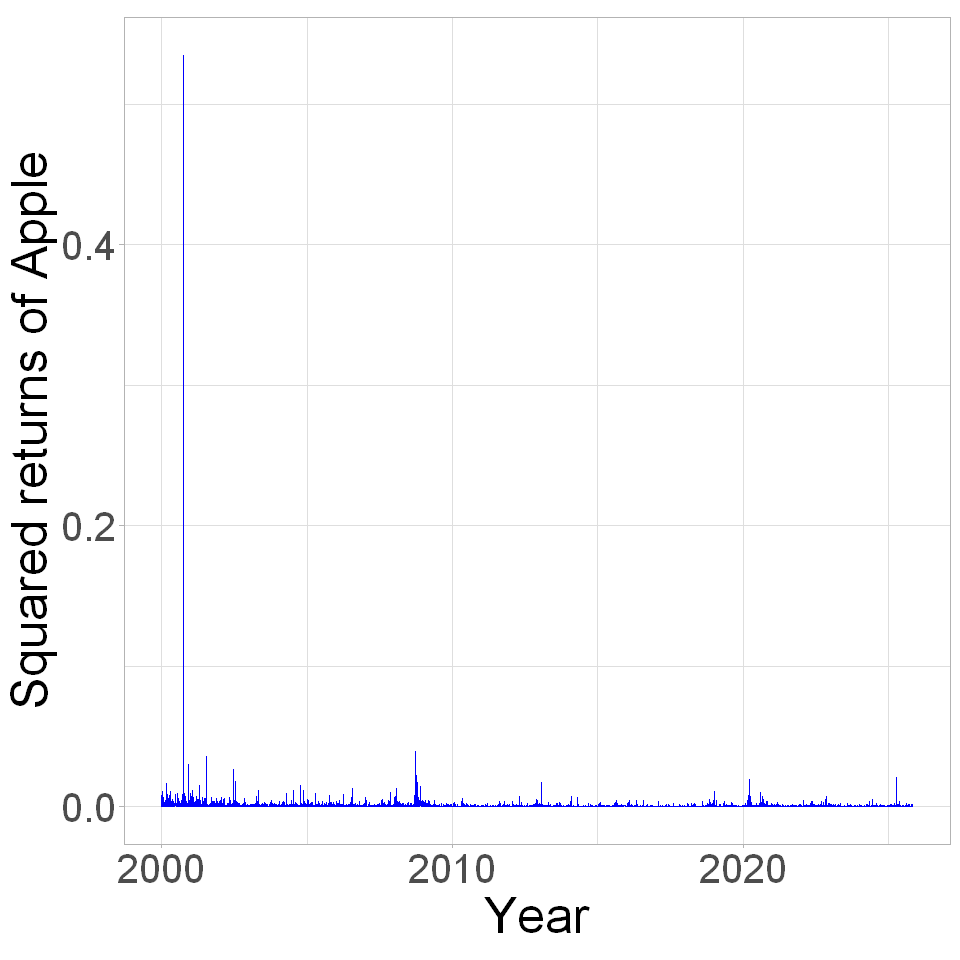

In [44]:
library(ggplot2)
library(ggfortify)
options(repr.plot.width=8, repr.plot.height=8)
fig = autoplot(dapple^2, colour = 'blue')
fig = fig + theme(aspect.ratio=1) +
theme_light() +
theme(aspect.ratio=1) +
theme(plot.margin = ggplot2::margin(0.2, 0.2, 0.2, 0.2, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Year") +
labs(y = "Squared returns of Apple")
fig

<div style="background-color:lightyellow; padding:15px; border-radius:5px;">
  <h3>Interpretation of the Squared Returns Plot</h3>
  <p>The figure displays the <strong>squared returns of Apple</strong> over time, which approximate the series’ conditional variance. 
  This allows us to visually inspect how volatility evolves.</p>

  <ul>
    <li>A few extreme spikes—particularly around the early 2000s—indicate periods of exceptionally high volatility. 
        These could correspond to major market events or data irregularities.</li>
    <li>After these early spikes, the variance appears much lower and more stable, 
        with occasional smaller volatility bursts around 2008–2009 and later years.</li>
    <li>The long stretches of calm followed by short bursts of volatility 
        are indicative of <strong>volatility clustering</strong>, a typical feature of financial returns 
        and consistent with the presence of <strong>ARCH effects</strong>.</li>
  </ul>

  <p><strong>Conclusion:</strong> 
  The squared returns are mostly small but occasionally exhibit large, isolated spikes, suggesting 
  that Apple’s return volatility is not constant over time. 
  This visual evidence points to <em>time-varying conditional variance</em>, 
  which can be formally tested using ARCH or GARCH modeling techniques.</p>
</div>


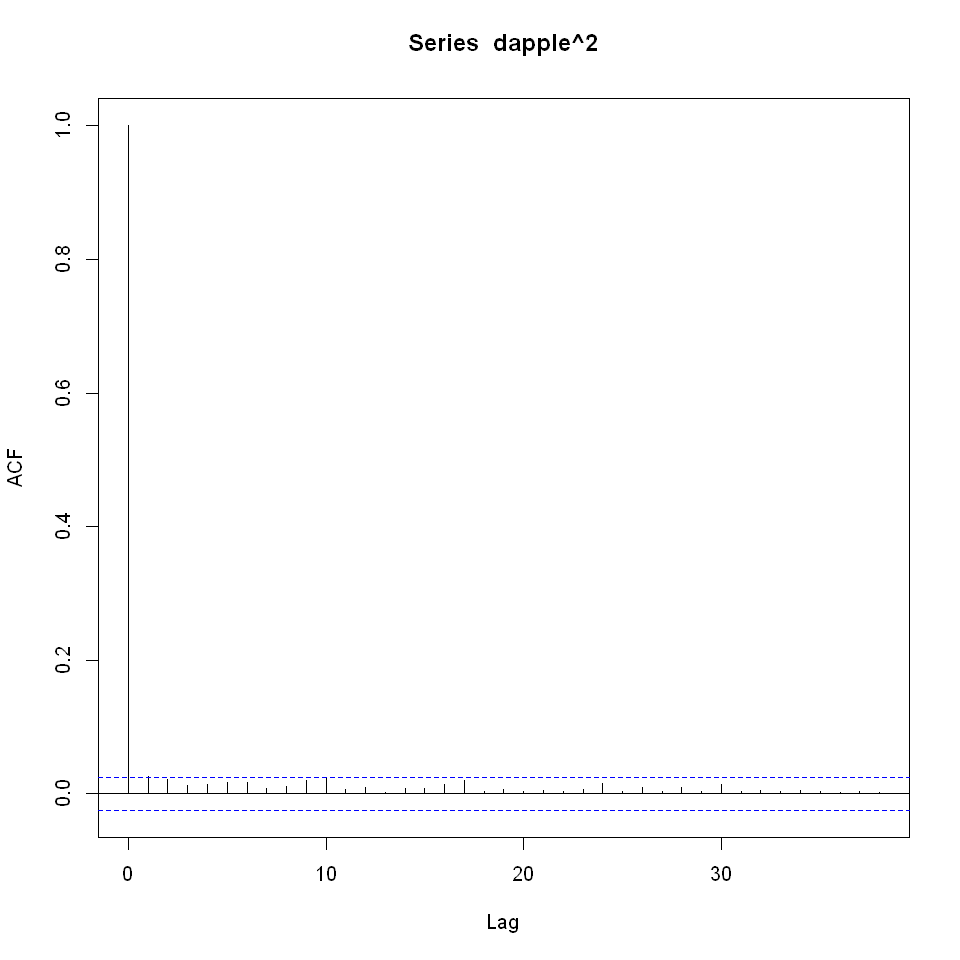

In [45]:
acf(dapple^2) 

<div style="background-color:lightyellow; padding:15px; border-radius:5px;">
  <h3>Interpretation of the ACF of Squared Returns</h3>
  <p>The figure shows the <strong>Autocorrelation Function (ACF)</strong> of the <strong>squared returns</strong> of Apple. 
  This plot helps detect whether volatility (conditional variance) is correlated over time — a key feature of ARCH effects.</p>

  <ul>
    <li>For all lags other than lag=0, autocorrelations drop quickly and remain within the 95% confidence bounds 
        (the blue dashed lines).</li>
    <li>This pattern suggests <strong>no significant serial correlation</strong> in the squared returns — 
        volatility does not appear to depend systematically on past volatility.</li>
  </ul>

  <p><strong>Conclusion:</strong> 
  Based on the ACF of squared returns, there is <strong>no strong visual evidence of ARCH effects</strong> in Apple’s returns. 
  Volatility clustering is not pronounced, meaning that high-volatility periods are not strongly correlated with one another. 
  However, formal tests (such as the ARCH-LM test) would be needed to confirm this result statistically.</p>
</div>


Series: dapple 
ARIMA(3,0,3) with non-zero mean 

Coefficients:
          ar1      ar2      ar3     ma1     ma2     ma3   mean
      -0.4581  -0.6816  -0.4681  0.4198  0.6663  0.4298  9e-04
s.e.   0.1257   0.0952   0.0588  0.1299  0.0928  0.0581  3e-04

sigma^2 = 0.0006317:  log likelihood = 14716.89
AIC=-29417.77   AICc=-29417.75   BIC=-29363.54

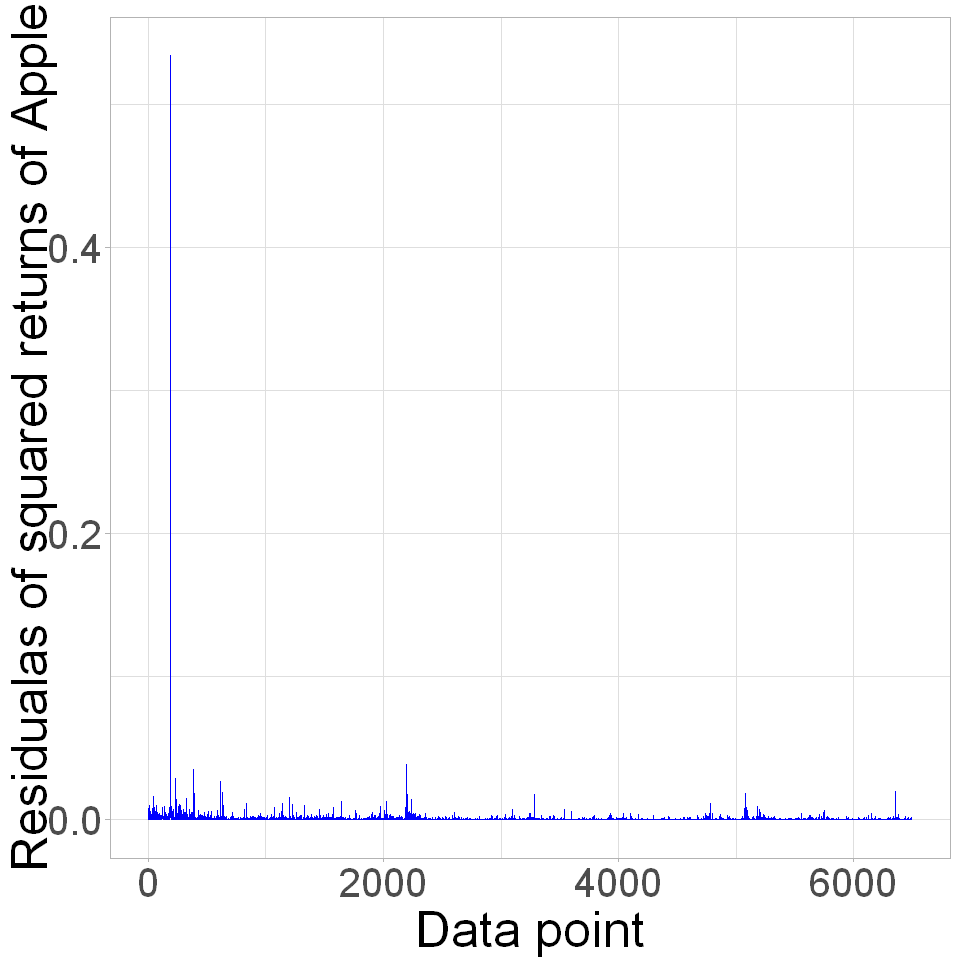

In [46]:
model.dapple = auto.arima(dapple, max.p = 20, max.q = 20)
model.dapple
res.dapple = model.dapple$residuals

library(ggplot2)
library(ggfortify)
options(repr.plot.width=8, repr.plot.height=8)
fig = autoplot(res.dapple^2, colour = 'blue')
fig = fig + theme(aspect.ratio=1) +
theme_light() +
theme(aspect.ratio=1) +
theme(plot.margin = ggplot2::margin(0.2, 0.2, 0.2, 0.2, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Data point") +
labs(y = "Residualas of squared returns of Apple")
fig

<div style="background-color:lightyellow; padding:15px; border-radius:5px;">
  <h3>Interpretation of the Squared Residuals Plot</h3>
  <p>The figure shows the <strong>squared residuals of Apple’s returns</strong> over time. 
  Squared residuals approximate the <em>conditional variance</em> after accounting for the mean dynamics of the series 
  (e.g., ARMA structure). This plot helps assess whether volatility changes remain after modeling the mean correctly.</p>

  <p>Both plots — the squared returns of Apple and the residuals from a fitted model of those squared returns — show very similar patterns.</p>

<ul>
<li>The squared returns show strong spikes at certain points (especially around the early 2000s), reflecting periods of large volatility.</li>

<li>The residuals of the squared returns still display nearly the same spikes and clustering, suggesting that <strong>the mean model (e.g., ARMA)</strong> did not capture much of the volatility dynamics.</li>

<li>In other words, <strong>the volatility structure remains unexplained</strong> — the conditional variance is not yet fully modeled. This implies that a variance model, such as an ARCH or GARCH specification, is needed to account for time-varying volatility.</li>
</ul>

<p><strong>Conclusion:</strong> 
  Since the residuals of the squared returns look visually similar to the original squared returns, it indicates that <em>conditional heteroskedasticity remains</em> even after modeling the mean. 
  The volatility clustering visible in both plots suggests the presence of <strong>ARCH effects</strong> that should be modeled explicitly with an ARCH or GARCH process.</p>
</div>


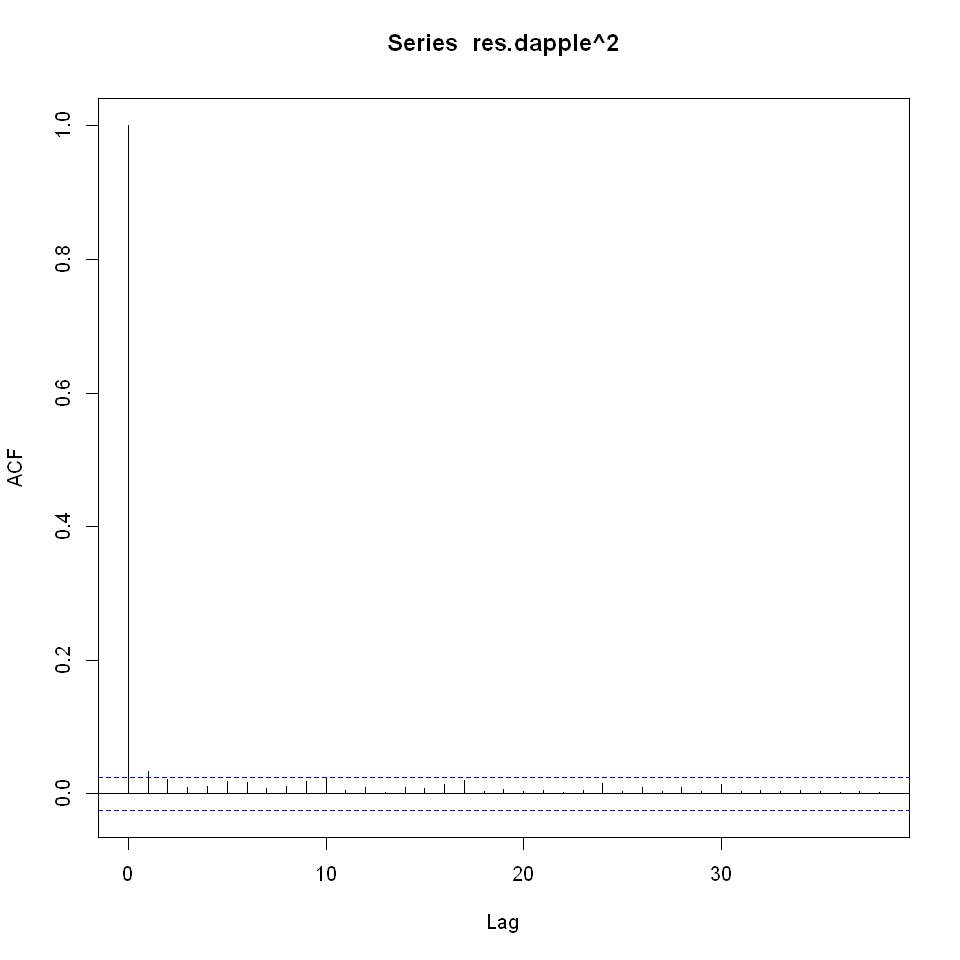

In [47]:
acf(res.dapple^2) 

<div style="background-color:lightyellow; padding:15px; border-radius:5px;">
  <h3>Interpretation of the ACF of Squared Residuals</h3>
  <p>The plot displays the <strong>Autocorrelation Function (ACF)</strong> of the <strong>squared residuals</strong> from the fitted model. 
  This diagnostic is used to detect any remaining serial dependence in volatility — that is, whether <em>ARCH effects</em> persist after modeling the conditional mean.</p>

  <ul>
    <li>The first bar (lag 0) represents the autocorrelation of the series with itself and is always equal to 1, so it is not interpreted.</li>
    <li>The <strong>first-order autocorrelation</strong> is small but statistically significant, while all higher-order autocorrelations lie <strong>within the 95% confidence bounds</strong> (the dashed blue lines).</li>
    <li>This indicates that there is <strong>some short-term dependence</strong> in the conditional variance, but the effect is weak and not persistent across multiple lags.</li>
  </ul>

  <p><strong>Conclusion:</strong> 
  The presence of a small but significant first-order autocorrelation suggests a <em>mild ARCH(1) effect</em> — 
  volatility at time <em>t</em> may depend slightly on volatility from the previous period. 
  However, since higher-order autocorrelations are insignificant, the volatility clustering is <strong>short-lived</strong> 
  and not strongly systematic.</p>
</div>


<div style="background-color:lightyellow; padding:15px; border-radius:5px;">
  <h3>Interpretation of the Squared Residuals Plot and Its ACF</h3>

  <p>The <strong>plot of squared residuals</strong> shows visible clusters of high volatility, suggesting that 
  volatility is not constant over time. However, the <strong>ACF of squared residuals</strong> indicates 
  that only the first lag is statistically significant, with all higher lags within the confidence bounds.</p>

  <ul>
    <li>This pattern means that volatility changes exist, but they are <strong>short-lived</strong> rather than persistent.</li>
    <li>The clustering seen in the plot likely reflects <strong>random bursts of volatility</strong> rather than systematic, predictable patterns.</li>
    <li>Because serial correlation in the squared residuals is minimal, there is <strong>little evidence of strong ARCH effects</strong>.</li>
  </ul>

  <p><strong>Conclusion:</strong> 
  Although the squared residuals show occasional volatility clusters, the ACF results imply that these bursts 
  are <em>mostly random and not predictable</em>. The volatility does not display strong dependence on its own past, 
  suggesting that a standard constant-variance model or, at most, a weak ARCH(1) specification would be sufficient.</p>
</div>


<div style="background-color:#e6f2ff; padding:15px; border-radius:6px; line-height:1.6;">
  <h2>Testing for ARCH Effects: Engle’s ARCH-LM Test</h2>

  <p>Visual tools (plots/ACFs of squared residuals) can suggest volatility clustering, but a <strong>formal test</strong> is preferred. Engle’s ARCH-LM test provides this check.</p>

  <p><strong>Procedure</strong></p>
  <ol>
    <li><strong>Model the conditional mean</strong> and obtain residuals <em>&ucirc;<sub>t</sub></em>.</li>
    <li><strong>Auxiliary regression</strong> (ARCH(<em>p</em>)):<br>
      $$\hat u_t^{\,2}=\alpha_0+\alpha_1\hat u_{t-1}^{\,2}+\cdots+\alpha_p\hat u_{t-p}^{\,2}+v_t$$
    </li>
    <li><strong>Null hypothesis</strong>: 
      $$\alpha_1=\alpha_2=\cdots=\alpha_p=0 \quad \text{(no ARCH effects)}$$
    </li>
  </ol>

  <p><strong>Test statistic (with effective sample)</strong></p>
  <p style="margin-left:20px;">
    $$Q=(T-p)\times R^2,$$
  </p>
  <p>where <em>T</em> is the sample size of <em>&ucirc;<sub>t</sub></em>, <em>p</em> is the number of lags in the auxiliary regression, and <em>R²</em> is the <em>R²</em> in the auxiliary regression. Under the null, 
    $$Q \sim \chi^2(p).$$
    Reject the null if <em>Q</em> exceeds the <em>&chi;<sup>2</sup></em> critical value.</p>

  <h4>How to choose <em>p</em>?</h4>
  <ul>
<li><strong>Use several reasonable orders</strong> and check robustness: e.g., <em>p</em> ∈ {1, 4, 8, 12} (monthly/quarterly style horizons) or up to about <em>√T</em>.</li>
<li><strong>Report a small table</strong> of p-values across <em>p</em>. If many (or any key) orders are significant, that’s evidence of ARCH effects.</li>
  </ul>

  <p><strong>Reminder:</strong> Ensure the <em>mean</em> model is well specified first (residuals uncorrelated). Otherwise, leftover mean dynamics can masquerade as ARCH.</p>
</div>



<div style="background-color:#e6f2ff; padding:15px; border-radius:6px; line-height:1.6;">
  <h2>Testing for ARCH Effects: Engle’s ARCH-LM Test</h2>
    <p><strong>Step 1: Estimate conditional mean model</strong></p>
</div>    

In [48]:
# Step 1: Fit mean model automatically (allow up to AR/MA(20))
step1.dapple = auto.arima(dapple, max.p = 20, max.q = 20)

# Inspect selected ARIMA mean model
step1.dapple                 

Series: dapple 
ARIMA(3,0,3) with non-zero mean 

Coefficients:
          ar1      ar2      ar3     ma1     ma2     ma3   mean
      -0.4581  -0.6816  -0.4681  0.4198  0.6663  0.4298  9e-04
s.e.   0.1257   0.0952   0.0588  0.1299  0.0928  0.0581  3e-04

sigma^2 = 0.0006317:  log likelihood = 14716.89
AIC=-29417.77   AICc=-29417.75   BIC=-29363.54

<div style="background-color:#e6f2ff; padding:15px; border-radius:6px; line-height:1.6;">
  <h2>Testing for ARCH Effects: Engle’s ARCH-LM Test</h2>
    <p><strong>Step 2: Run Engle’s ARCH-LM Test</strong></p>
</div> 


Call:
arima(x = dapple, order = c(3, 0, 3))

Coefficients:
          ar1      ar2      ar3     ma1     ma2     ma3  intercept
      -0.4581  -0.6816  -0.4681  0.4198  0.6663  0.4298      9e-04
s.e.   0.1257   0.0952   0.0588  0.1299  0.0928  0.0581      3e-04

sigma^2 estimated as 0.000631:  log likelihood = 14716.89,  aic = -29417.77

ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order   PQ p.value
[1,]     4 11.9  0.0179
[2,]     8 17.1  0.0293
[3,]    12 23.8  0.0219
[4,]    16 26.1  0.0530
[5,]    20 29.3  0.0819
[6,]    24 31.3  0.1465
Lagrange-Multiplier test: 
     order     LM p.value
[1,]     4 157123       0
[2,]     8  73970       0
[3,]    12  45968       0
[4,]    16  34083       0
[5,]    20  26199       0
[6,]    24  21798       0


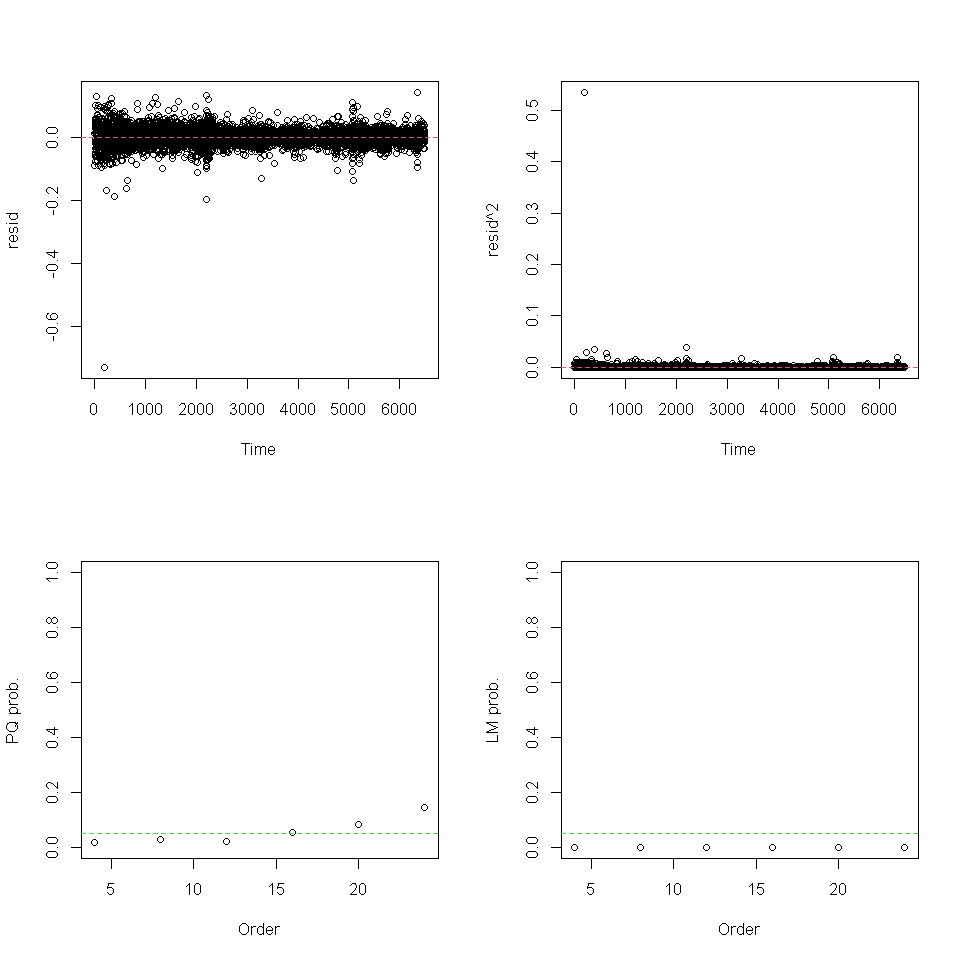

In [49]:
# Mean model chosen earlier via auto.arima: ARMA(3,3)
# ARCH/GARCH utilities incl. arch.test()
library(aTSA)   

# Fit ARMA(3,3) to (stationary) returns
est = arima(dapple, order = c(3,0,3))

# Print coefficients/AIC
est                                    

# Engle’s ARCH-LM on residuals (null: no ARCH). Small p-value ⇒ model volatility (ARCH/GARCH)
arch.test(est)

<div style="background-color:lightyellow; padding:15px; border-radius:5px;">
  <h3>Interpretation of the ARCH-LM Test vs. ACF of Squared Residuals</h3>

  <p>The <strong>ACF of squared residuals</strong> and the <strong>ARCH-LM test</strong> both assess volatility clustering, 
  but they measure it differently, which explains why the conclusions can diverge.</p>

<ul>
<li><strong>ACF of squared residuals:</strong>  
        This is a <em>visual and descriptive</em> tool.  
        It looks for significant autocorrelations in the squared residuals to see if volatility persists over time.  
        Here, only the first lag was slightly above the confidence bounds — suggesting <strong>weak short-term autocorrelation</strong> in volatility.</li>

<li><strong>ARCH-LM test (Engle’s test):</strong>  
        This is a <em>formal joint test</em> of whether several past squared residuals jointly explain current volatility.  
        It is more sensitive and often picks up effects that individual ACF bars do not.  
        Even small individual correlations can jointly produce a <strong>highly significant test statistic</strong> when combined across several lags.</li>
</ul>

<p>Here, the LM test shows extremely large statistics and <strong>p-values ≈ 0</strong> for all lag orders tested (4, 8, 12, 16, 20, 24).  
  This provides overwhelming evidence of <strong>conditional heteroskedasticity</strong> — the presence of ARCH effects — even though the ACF plot looked almost flat.</p>

  <p><strong>Why this happens:</strong></p>
  <ul>
    <li>The ACF is a point-by-point test (each lag individually). It can miss weak but persistent correlations.</li>
    <li>The LM test pools information across multiple lags, giving it much greater statistical power.</li>
    <li>Even small, individually insignificant autocorrelations can add up to a large joint LM statistic.</li>
  </ul>

  <p><strong>Conclusion:</strong>  
  Although the ACF showed only weak first-order correlation, the LM test confirms that the residual variance 
  still depends strongly on its past values.  
  Therefore, there are clear and significant <strong>ARCH effects</strong>, meaning volatility is not random but clustered and predictable over time — 
  consistent with the need to fit an <strong>ARCH or GARCH model</strong>.</p>
</div>


In [50]:
# ARCH-LM (p = 1): Manual test for first-order autocorrelation in squared residuals
step1.dapple = arima(dapple, order = c(3,0,3))
step1.dapple.res = step1.dapple$residuals
step1.dapple.res2 = step1.dapple.res^2

T.temp = length(step1.dapple.res2)                 # total obs in u_t^2
x.temp = step1.dapple.res2[2:T.temp]               # u_{t-1}^2  (lag 1)
y.temp = step1.dapple.res2[1:(T.temp - 1)]         # u_t^2 aligned with lag

step2.dapple = lm(y.temp ~ x.temp)                 # auxiliary OLS: u_t^2 ~ u_{t-1}^2
step2.dapple                                       # regression output
summary(step2.dapple)$r.squared                    # R^2 from auxiliary regression

# LM statistic Q = (T_eff) * R^2 with df = 1
step2.dapple.res = step2.dapple$residuals
R2 = 1 - var(step2.dapple.res) / var(y.temp)       # same as summary(.)$r.squared
Q  = length(y.temp) * R2                           # T_eff = T - 1 after lagging

print("The test statistic is"); Q
print("The critical value is"); qchisq(0.95, df = 1)

# Decision: TRUE ⇒ reject H0 (no ARCH(1))
print("We reject the null of homoskedasticity, TRUE or FALSE")
Q > qchisq(0.95, df = 1)


Call:
lm(formula = y.temp ~ x.temp)

Coefficients:
(Intercept)       x.temp  
  0.0006096    0.0341271  


[1] 0.001164456

[1] "The test statistic is"


[1] 7.564306

[1] "The critical value is"


[1] 3.841459

[1] "We reject the null of homoskedasticity, TRUE or FALSE"


[1] TRUE

<div style="background-color:#e6f2ff; padding:15px; border-radius:6px; line-height:1.6;">
  <h2>Exercise 1</h2>

Test for the ARCH effect in the BWM returns.
</div>      

<div style="background-color:#e6f2ff; padding:15px; border-radius:6px; line-height:1.6;">
  <h2>Solution to Exercise 1</h2>
</div>   

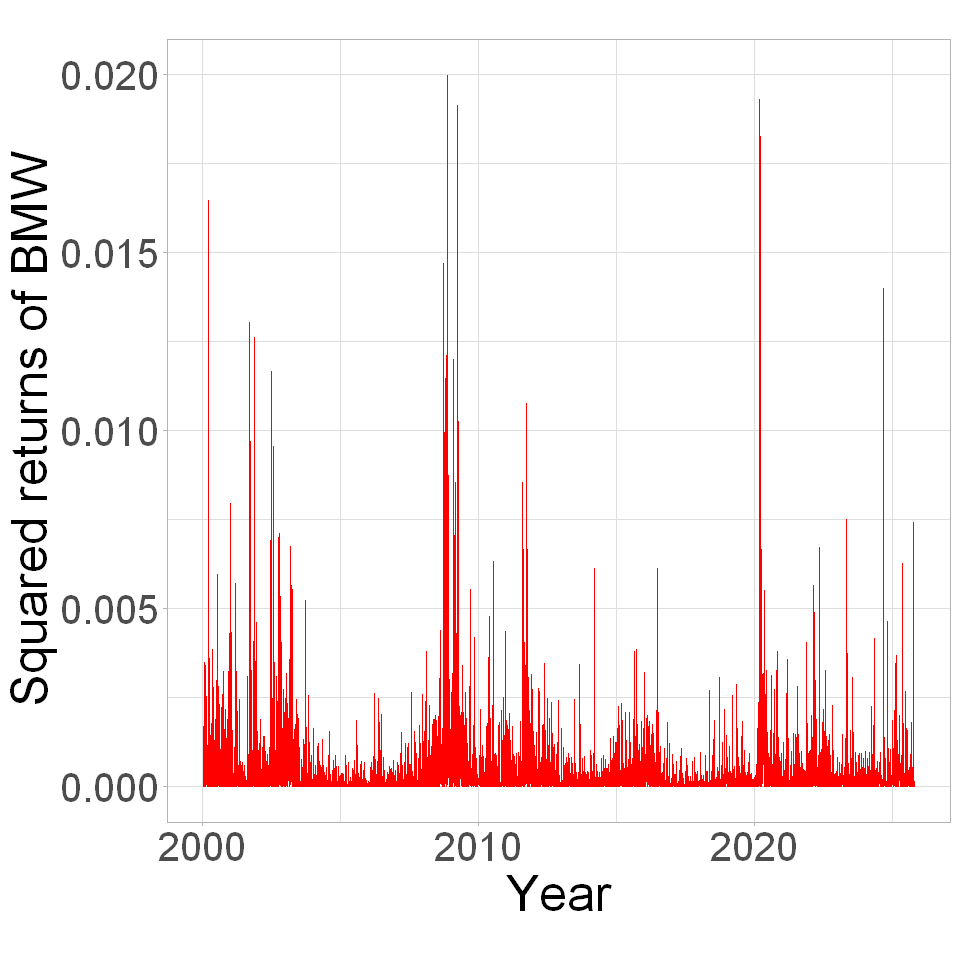

In [51]:
library(ggplot2)
library(ggfortify)
options(repr.plot.width=8, repr.plot.height=8)
fig = autoplot(dbmw^2, colour = 'red')
fig = fig + theme(aspect.ratio=1) +
theme_light() +
theme(aspect.ratio=1) +
theme(plot.margin = ggplot2::margin(0.2, 0.2, 0.2, 0.2, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Year") +
labs(y = "Squared returns of BMW")
fig

<div style="background-color:lightyellow; padding:15px; border-radius:5px;">
  <h3>Interpretation of the Squared Returns Plot for BMW</h3>

  <p>The figure displays the <strong>squared daily returns of BMW</strong> over time. 
  Squared returns approximate the conditional variance of the series and are used to visually inspect 
  volatility patterns and potential ARCH effects.</p>

  <ul>
    <li>The plot shows several distinct <strong>volatility clusters</strong> — 
        periods where large squared returns (high volatility) are followed by more large values, 
        particularly during financial turmoil around <strong>2008–2009</strong> and again around <strong>2020</strong>.</li>

<li>Between these clusters, there are extended periods of <strong>low volatility</strong> 
        where the squared returns remain close to zero.</li>

<li>This alternating pattern of calm and turbulent periods indicates that 
        volatility is <strong>time-varying</strong> rather than constant — a hallmark of 
        <strong>conditional heteroskedasticity</strong> or <strong>ARCH effects</strong>.</li>
</ul>

  <p><strong>Conclusion:</strong>  
  The squared returns of BMW exhibit clear signs of <strong>volatility clustering</strong>: 
  large shocks tend to be followed by large shocks, and small by small. 
  This suggests that the unconditional variance is not constant over time, and modeling 
  the conditional variance using an <strong>ARCH or GARCH model</strong> would be appropriate 
  to capture this volatility behavior.</p>
</div>


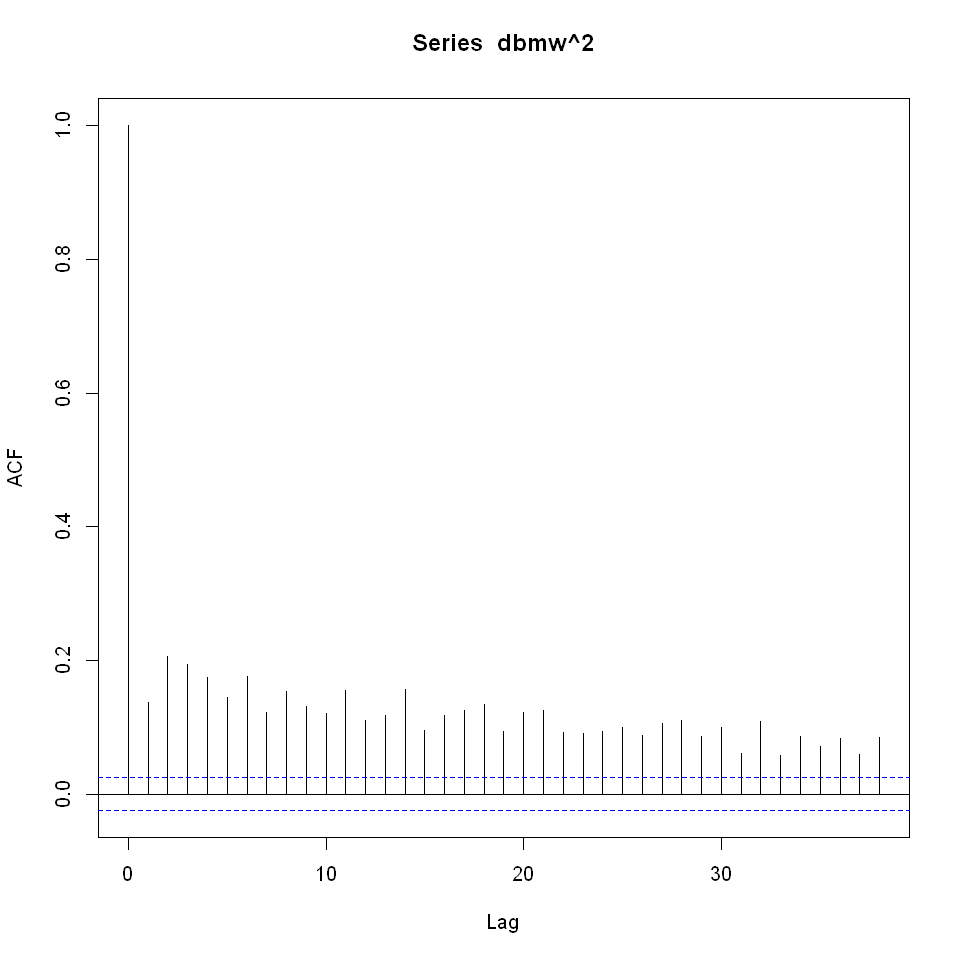

In [52]:
acf(dbmw^2)

<div style="background-color:lightyellow; padding:15px; border-radius:5px;">
  <h3>Interpretation of the ACF of Squared Returns for BMW</h3>

  <p>The figure presents the <strong>Autocorrelation Function (ACF)</strong> of the <strong>squared returns</strong> of BMW. 
  This diagnostic helps assess whether volatility (conditional variance) is serially correlated — 
  a defining feature of <em>ARCH effects</em>.</p>

  <ul>
    <li><strong>All autocorrelations are above the 95% confidence bounds</strong>, 
        indicating that the dependence in the squared returns is not limited to short lags 
        but persists across many periods.</li>
    <li>This widespread significance suggests that <strong>volatility shocks are long-lasting</strong> — 
        high-volatility periods are followed by other high-volatility periods, 
        and low-volatility periods by low-volatility ones.</li>
    <li>The slowly decaying pattern implies <strong>strong volatility persistence</strong>, 
        where conditional variance depends heavily on its past values rather than being random or short-lived.</li>
  </ul>

  <p><strong>Conclusion:</strong>  
  The ACF of BMW’s squared returns shows <strong>significant autocorrelation at almost all lags</strong>, 
  providing strong evidence of <strong>persistent ARCH effects</strong>. 
  This means volatility is highly time-dependent and clusters over extended periods. 
  To capture this dynamic structure, a <strong>GARCH-type model</strong> is recommended, 
  as it allows past volatility to influence current variance over many lags.</p>
</div>



Series: dbmw 
ARIMA(2,0,1) with zero mean 

Coefficients:
         ar1      ar2      ma1
      0.4036  -0.0330  -0.3925
s.e.  2.3884   0.0173   2.3922

sigma^2 = 0.000415:  log likelihood = 16343.93
AIC=-32679.87   AICc=-32679.86   BIC=-32652.68

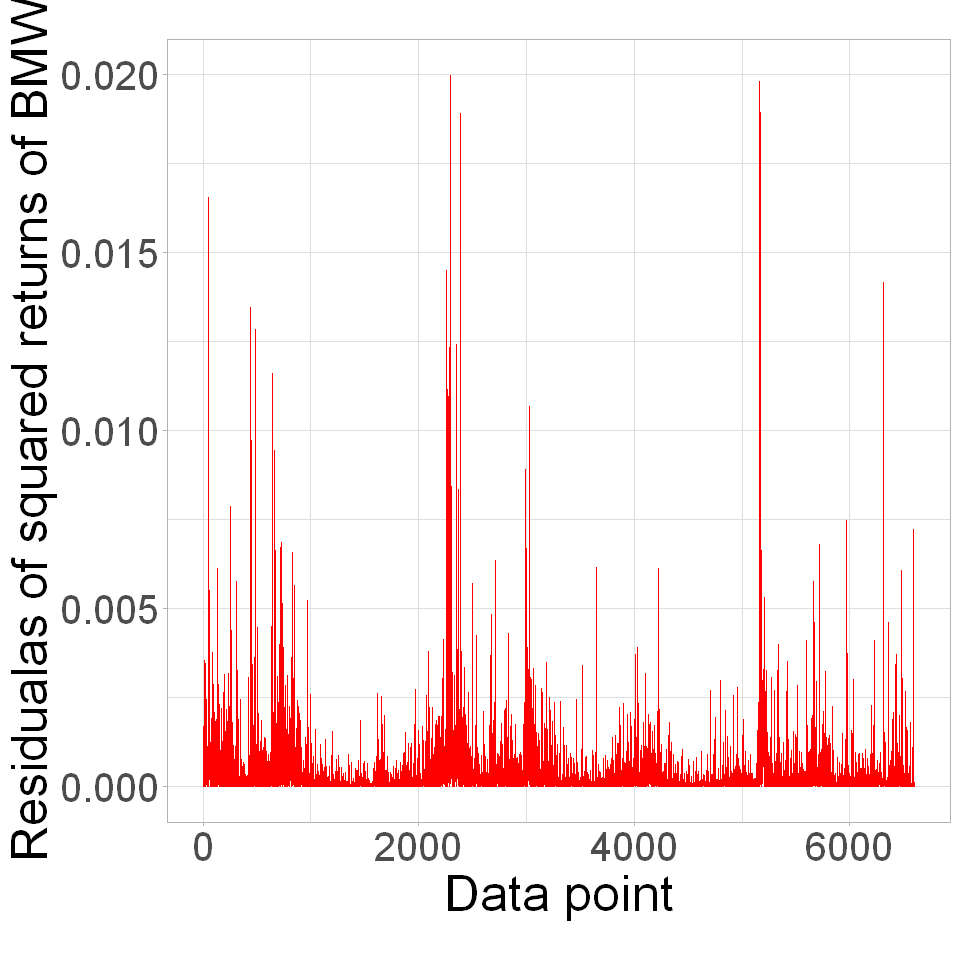

In [53]:
model.dbmw = auto.arima(dbmw, max.p = 20, max.q = 20)
model.dbmw
res.dbmw = model.dbmw$residuals

library(ggplot2)
library(ggfortify)
options(repr.plot.width=8, repr.plot.height=8)
fig = autoplot(res.dbmw^2, colour = 'red')
fig = fig + theme(aspect.ratio=1) +
theme_light() +
theme(aspect.ratio=1) +
theme(plot.margin = ggplot2::margin(0.2, 0.2, 0.2, 0.2, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Data point") +
labs(y = "Residualas of squared returns of BMW")
fig

<div style="background-color:lightyellow; padding:15px; border-radius:5px;">
  <h3>Interpretation of the Squared Residuals Plot for BMW</h3>
  <p>The figure shows the <strong>squared residuals of BMW’s returns</strong> over time. 
  Squared residuals approximate the <em>conditional variance</em> after accounting for the mean dynamics 
  (here modeled using an ARMA(2,1) structure). 
  This plot is used to evaluate whether time-varying volatility remains after the mean has been properly specified.</p>

<ul>
<li>The plot still displays <strong>pronounced volatility clusters</strong> — periods of high volatility 
        (notably in the early 2000s, around 2008–2009, and near 2020) followed by more tranquil intervals.</li>

<li>These patterns indicate that <strong>the mean model did not fully capture the dynamics of volatility</strong>. 
        The residuals continue to show large, persistent spikes, implying that the variance is not constant over time.</li>

<li>The strong clustering behavior in the squared residuals suggests the presence of 
        <strong>conditional heteroskedasticity</strong>, meaning the conditional variance depends on past shocks 
        and remains serially correlated.</li>
</ul>

  <p><strong>Conclusion:</strong>  
  The residuals of the squared returns still exhibit clear volatility clustering, 
  similar to what was observed in the original squared returns of BMW. 
  This confirms that the ARMA mean model alone is insufficient to explain the data’s time-varying volatility. 
  Therefore, a <strong>GARCH-type model</strong> is recommended to explicitly model and capture these ARCH effects.</p>
</div>


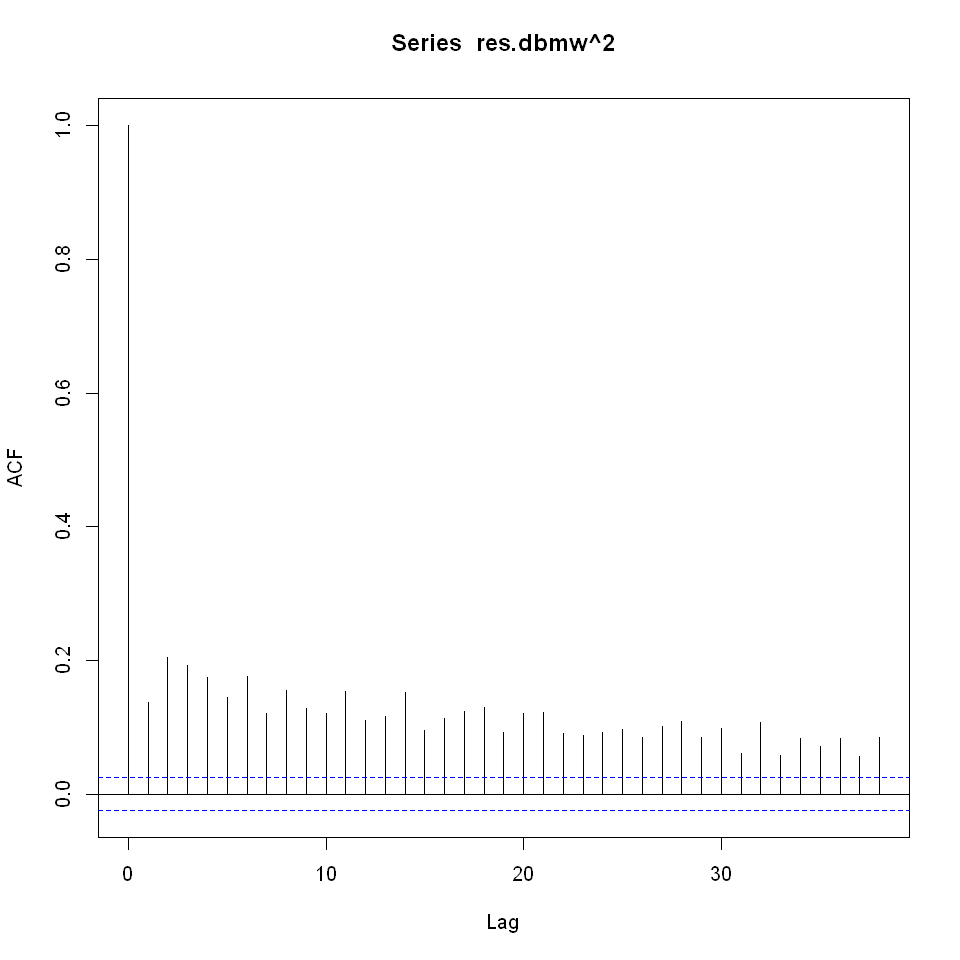

In [54]:
acf(res.dbmw^2)

<div style="background-color:lightyellow; padding:15px; border-radius:5px;">
  <h3>Interpretation of the ACF of Squared Residuals for BMW</h3>

  <p>The figure presents the <strong>Autocorrelation Function (ACF)</strong> of the <strong>squared residuals</strong> 
  from BMW’s return model. This plot is used to check whether any <em>conditional heteroskedasticity</em> 
  (ARCH effects) remains after modeling the mean dynamics with an ARMA process.</p>

<ul>
<li>All of the autocorrelations are <strong>significantly above the 95% confidence bounds</strong>, 
        extending across many lags. This suggests that serial dependence in the variance persists even 
        after fitting the ARMA mean model.</li>

<li>The positive autocorrelations decay slowly, indicating that <strong>volatility clustering is strong and long-lasting</strong>. 
        In other words, high-volatility periods tend to be followed by more high-volatility periods.</li>

<li>Because significant autocorrelation remains in the squared residuals, the conditional variance 
        is still time-dependent — the ARMA model has not captured the heteroskedasticity structure.</li>
</ul>

  <p><strong>Conclusion:</strong>  
  The ACF of BMW’s squared residuals shows <strong>significant and persistent autocorrelation</strong> across many lags, 
  confirming that <em>ARCH effects remain</em> even after modeling the mean. 
  This is strong evidence of <strong>conditional heteroskedasticity</strong>, and it suggests that a 
  <strong>GARCH-type model</strong> should be estimated to properly account for BMW’s time-varying volatility.</p>
</div>


In [55]:
# Step 1: Fit mean model automatically (allow up to AR/MA(20))
step1.dbmw = auto.arima(dbmw, max.p = 20, max.q = 20)

# Inspect selected ARIMA mean model
step1.dbmw                

Series: dbmw 
ARIMA(2,0,1) with zero mean 

Coefficients:
         ar1      ar2      ma1
      0.4036  -0.0330  -0.3925
s.e.  2.3884   0.0173   2.3922

sigma^2 = 0.000415:  log likelihood = 16343.93
AIC=-32679.87   AICc=-32679.86   BIC=-32652.68


Call:
arima(x = dbmw, order = c(2, 0, 1))

Coefficients:
         ar1      ar2      ma1  intercept
      0.4467  -0.0332  -0.4359      2e-04
s.e.  5.3238   0.0198   5.3330      2e-04

sigma^2 estimated as 0.0004148:  log likelihood = 16344.2,  aic = -32678.4

ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order   PQ p.value
[1,]     4  847       0
[2,]     8 1448       0
[3,]    12 1885       0
[4,]    16 2269       0
[5,]    20 2633       0
[6,]    24 2893       0
Lagrange-Multiplier test: 
     order   LM p.value
[1,]     4 5837       0
[2,]     8 2543       0
[3,]    12 1606       0
[4,]    16 1177       0
[5,]    20  928       0
[6,]    24  766       0


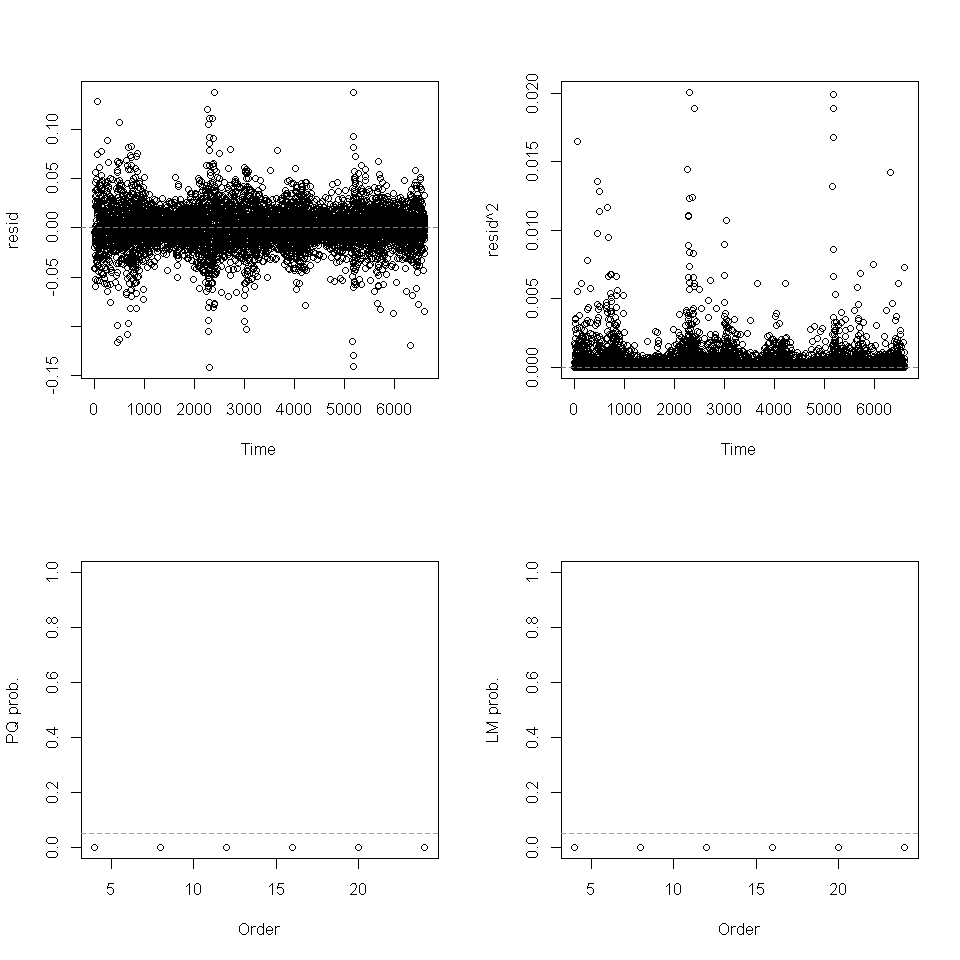

In [56]:
# Mean model chosen earlier via auto.arima: ARMA(3,3)
# ARCH/GARCH utilities incl. arch.test()
library(aTSA)   

# Fit ARMA(2,1) to (stationary) returns
est = arima(dbmw, order = c(2,0,1))

# Print coefficients/AIC
est                                    

# Engle’s ARCH-LM on residuals (null: no ARCH). Small p-value ⇒ model volatility (ARCH/GARCH)
arch.test(est)

<div style="background-color:lightyellow; padding:15px; border-radius:5px;">
  <h3>Interpretation of the Engle’s ARCH-LM Test for BMW</h3>

  <p>The table displays the results of <strong>Engle’s Lagrange Multiplier (ARCH-LM) test</strong> for various lag orders. 
  This test examines whether past squared residuals jointly explain current volatility — 
  in other words, whether <strong>ARCH effects</strong> are present in the residuals of BMW’s return model.</p>

<ul>
<li>For each lag order (4, 8, 12, 16, 20, 24), the LM statistic is <strong>very large</strong> and 
        the corresponding p-value is essentially <strong>0</strong>.</li>

<li>This means the null hypothesis of <em>no ARCH effects</em> is <strong>strongly rejected</strong> 
        at all lag lengths considered.</li>

<li>The decreasing magnitude of the LM statistic across higher orders (from 5837 at order 4 to 766 at order 24) 
        suggests that most of the ARCH dependence is concentrated in the first few lags, 
        but volatility persistence remains significant throughout.</li>
</ul>

  <p><strong>Conclusion:</strong>  
  The ARCH-LM test provides <strong>overwhelming evidence</strong> of conditional heteroskedasticity in BMW’s returns.  
  Volatility is not constant but depends on past shocks, confirming the presence of strong <strong>ARCH effects</strong>.  
  Consequently, a <strong>GARCH-type model</strong> is needed to capture the time-varying volatility dynamics of BMW’s returns.</p>
</div>


<div style="background-color:#e6f2ff; padding:15px; border-radius:6px; line-height:1.6;">
  <h2>Estimating ARMA-GARCH Model</h2>
</div>    

In [57]:
library(rugarch)
spec = ugarchspec(
  variance.model = list(model = "sGARCH", garchOrder = c(1, 1)),
  mean.model     = list(armaOrder = c(3, 3), include.mean = TRUE),
  distribution.model = "norm"
)
garch.dapple = ugarchfit(spec, dapple)
garch.dapple@fit$matcoef    

,Estimate,Std. Error,t value,Pr(>|t|)
mu,1.758733e-03,2.248858e-04,7.820564,5.329071e-15
ar1,-1.228967e+00,3.346934e-04,-3671.918962,0.000000e+00
ar2,-1.219915e+00,2.328223e-04,-5239.684858,0.000000e+00
ar3,-9.888882e-01,1.408235e-03,-702.218145,0.000000e+00
ma1,1.228410e+00,6.956555e-06,176583.166432,0.000000e+00
ma2,1.226750e+00,4.541406e-05,27012.559576,0.000000e+00
ma3,9.938581e-01,3.342210e-05,29736.550066,0.000000e+00
omega,8.882576e-06,1.745264e-06,5.089532,3.589477e-07
alpha1,1.067522e-01,7.226858e-03,14.771589,0.000000e+00
beta1,8.848852e-01,6.107649e-03,144.881468,0.000000e+00


<div style="background-color:lightyellow; padding:15px; border-radius:5px;">
<h3>Interpretation of the ARMA(3,3)-GARCH(1,1) Model for Apple Returns</h3>

<p>The table reports the estimation results for an <strong>ARMA(3,3)-GARCH(1,1)</strong> model fitted to the series 
<em>dapple</em> (Apple’s returns). The ARMA component captures the linear dependence in the mean equation, 
while the GARCH component models the time-varying volatility (conditional variance).</p>

<h4>Mean Equation (ARMA(3,3))</h4>
<ul>
<li><strong>μ (constant):</strong> The mean return is estimated at <strong>0.00176</strong> and is highly significant 
(p &lt; 0.01), suggesting that Apple’s average daily return is positive and statistically different from zero.</li>

<li><strong>AR terms (ar1, ar2, ar3):</strong> 
<ul>
<li><strong>ar1 = -1.229***:</strong> Large, negative, and highly significant, indicating strong short-term mean reversion in returns.</li>
<li><strong>ar2 = -1.219***</strong> and <strong>ar3 = -0.099***:</strong> Both negative and significant, suggesting that past returns up to three days ago have persistent but decaying effects on today’s return.</li>
</ul>
</li>

<li><strong>MA terms (ma1, ma2, ma3):</strong>
<ul>
<li><strong>ma1 = 1.228***</strong>, <strong>ma2 = 1.227***</strong>, and <strong>ma3 = 0.994***:</strong> All large, positive, and significant, 
indicating that past shocks have strong positive effects on current returns, offsetting the negative AR effects and stabilizing short-run dynamics.</li>
</ul>
</li>
</ul>

<h4>Variance Equation (GARCH(1,1))</h4>
<ul>
<li><strong>ω (omega = 8.88×10⁻⁶***):</strong> The constant term is small but highly significant, representing the long-run average variance — a positive baseline level of volatility.</li>
<li><strong>α₁ (alpha1 = 0.107***):</strong> Measures the immediate impact of recent shocks (ARCH effect). Its significance indicates that large past shocks increase current volatility — evidence of short-term volatility clustering.</li>
<li><strong>β₁ (beta1 = 0.885***):</strong> Measures volatility persistence (GARCH effect). Its large and significant value (close to 1) implies that volatility is highly persistent — once volatility rises, it tends to remain elevated for a long period.</li>
</ul>

<p><strong>Conclusion:</strong>  
The ARMA(3,3)-GARCH(1,1) model effectively captures both the serial dependence in Apple’s mean returns 
and the strong volatility clustering typical of financial data. The large and significant β₁ (0.885) indicates 
<strong>high volatility persistence</strong>, while α₁ (0.107) confirms that new shocks have a substantial and immediate 
impact on volatility. Overall, Apple’s return volatility is <strong>time-varying, persistent, and influenced by past shocks</strong>, 
validating the use of a GARCH-type specification.</p>
</div>


<div style="background-color:#e6f2ff; padding:15px; border-radius:6px; line-height:1.6;">
  <h2>Forecasting with an ARMA–GARCH Model</h2>

  <h3>1. Pure AR Model (with Homoscedastic Errors)</h3>

  <p>In a simple AR(p) model with no ARCH or GARCH components, the errors are assumed to be 
  <strong>conditionally homoscedastic</strong> — meaning their variance is <strong>constant over time</strong>.</p>

  <ul>
    <li>As we forecast further into the future, the forecast error variance increases, but it does so at a 
        <strong>constant rate</strong> determined by the model’s <strong>innovation variance</strong> and autoregressive parameters.</li>
    <li>For an AR model, the forecast variance <strong>tends toward a constant long-run value</strong> 
        as the AR effects decay over multiple forecast steps.</li>
    <li>At any given forecast horizon <em>h</em>, the conditional forecast variance is 
        <strong>the same across time</strong> because the model does not adjust to recent volatility.</li>
  </ul>

  <p><strong>Conditional vs. Unconditional Variance in Mean-Only Models:</strong></p>
  <ul>
    <li>When we estimate only the mean (e.g., AR, MA, or ARMA models), the innovations 
        \(\varepsilon_t\) are assumed to have a constant conditional variance:
        $$\text{Var}(\varepsilon_t \mid \Omega_{t-1}) = \sigma^2.$$
        This is the <strong>one-step-ahead conditional variance</strong> of the process.</li>
    <li>However, the <strong>unconditional variance</strong> of the process \(y_t\) 
        depends on the ARMA parameters and is typically <em>larger</em> than \(\sigma^2\).  
        For example, for an AR(1) process \(y_t = a_0 + a_1 y_{t-1} + \varepsilon_t\):  
        $$\text{Var}(y_t) = \frac{\sigma^2}{1 - a_1^2}, \quad |a_1| < 1.$$</li>
    <li>Thus, while the <strong>conditional variance</strong> of the innovation is constant, 
        the <strong>unconditional variance</strong> of \(y_t\) depends on the persistence of the AR terms.</li>
  </ul>

  <hr>

  <h3>2. Conditional Heteroscedasticity (GARCH Model)</h3>

  <p>In a <strong>GARCH</strong> or <strong>AR–GARCH</strong> model, the conditional variance changes dynamically 
  based on past shocks and volatility. This introduces <em>time-varying conditional heteroscedasticity</em>.</p>

  <ul>
    <li>The <strong>conditional variance evolves over time</strong>, reflecting periods of high or low volatility.</li>
    <li>Forecast intervals can <strong>expand or contract</strong> depending on recent volatility, 
        unlike the steady pattern in homoscedastic models.</li>
    <li>After large shocks, the conditional variance rises sharply, 
        capturing <strong>volatility clustering</strong> — the tendency for volatility to persist once it increases.</li>
  </ul>

  <hr>

  <h3>3. Comparing Conditional and Unconditional Variances</h3>

  <ul>
    <li>In a <strong>homoscedastic AR/ARMA model</strong>, the innovation variance 
        \(\text{Var}(\varepsilon_t \mid \Omega_{t-1}) = \sigma^2\) is <strong>constant</strong>.  
        The unconditional variance of the process \(y_t\) depends on the model parameters (e.g., \(\sigma^2/(1-a_1^2)\) for AR(1)).</li>

<li>In a <strong>GARCH model</strong>, the conditional variance varies over time:
<ul>
<li>After periods of high volatility (e.g., financial crises), 
            the conditional variance may temporarily exceed the unconditional (long-run) variance.</li>
<li>As volatility stabilizes and no new shocks occur, the conditional variance 
            <strong>reverts to the unconditional variance</strong> — its long-run equilibrium level.</li>
</ul>
</li>
</ul>

  <hr>

  <h3>Summary</h3>
  <ul>
    <li><strong>AR(p) / ARMA models:</strong> assume constant innovation variance \(\sigma^2\); 
        forecast intervals widen steadily as the horizon increases, approaching the unconditional variance of \(y_t\).</li>
    <li><strong>GARCH models:</strong> allow the conditional variance to change over time; 
        forecast intervals adapt dynamically to recent shocks and volatility patterns.</li>
    <li>The GARCH framework captures <strong>volatility clustering</strong> — periods of high volatility followed by high volatility, and calm periods followed by calm — 
        a defining feature of financial time series.</li>
  </ul>
</div>



In [58]:
ugarchforecast(garch.dapple, n.ahead = 5)


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 5
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2025-10-31]:
       Series   Sigma
T+1 0.0013380 0.01556
T+2 0.0009887 0.01578
T+3 0.0016840 0.01599
T+4 0.0032059 0.01620
T+5 0.0008327 0.01641



<div style="background-color:#e6f2ff; padding:15px; border-radius:6px; line-height:1.6;">
  <h2>Exercise 2</h2>
    
Estimate ARMA-GARCH(1,1) model for BMW returns and produce 5 periods ahead forecasts
</div>    

<div style="background-color:#e6f2ff; padding:15px; border-radius:6px; line-height:1.6;">
  <h2>Solution to Exercise 2</h2>

</div>    

In [59]:
library(rugarch)
spec = ugarchspec(
  variance.model = list(model = "sGARCH", garchOrder = c(1, 1)),
  mean.model     = list(armaOrder = c(2, 1), include.mean = TRUE),
  distribution.model = "norm"
)
garch.dbmw = ugarchfit(spec, dbmw)
garch.dbmw@fit$matcoef    

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0003354191,7.900173e-05,4.245718,2.178944e-05
ar1,1.0058036073,1.265258e-02,79.493952,0.000000e+00
ar2,-0.0331980801,1.271876e-02,-2.610167,9.049801e-03
ma1,-0.9822924603,2.264151e-05,-43384.575524,0.000000e+00
omega,0.0000033698,1.737948e-06,1.938953,5.250700e-02
alpha1,0.0535447804,8.530577e-03,6.276806,3.455982e-10
beta1,0.9386469657,1.005459e-02,93.355114,0.000000e+00


<div style="background-color:lightyellow; padding:15px; border-radius:5px;">
<h3>Interpretation of the ARMA(2,1)-GARCH(1,1) Model for BMW Returns</h3>

<p>The table reports the estimation results for an <strong>ARMA(2,1)-GARCH(1,1)</strong> model fitted to the series 
<em>dbmw</em> (BMW’s returns). The ARMA component captures the short-run dynamics in the mean equation, 
while the GARCH component models the time-varying conditional variance (volatility).</p>

<h4>Mean Equation (ARMA(2,1))</h4>
<ul>
<li><strong>μ (constant):</strong> The mean return is estimated at <strong>0.00034</strong> and is statistically significant (p &lt; 0.01), 
indicating that BMW’s average daily return is positive and different from zero.</li>

<li><strong>AR terms:</strong>
<ul>
<li><strong>ar1 = 1.006***:</strong> Positive and highly significant, suggesting strong persistence in returns — 
today’s return is highly correlated with yesterday’s return.</li>
<li><strong>ar2 = -0.033**:</strong> Negative and statistically significant, indicating a mild corrective effect from returns two days ago. 
This pattern implies that returns tend to slightly revert after a strong positive movement.</li>
</ul>
</li>

<li><strong>MA term:</strong>
<ul>
<li><strong>ma1 = -0.982***:</strong> Large, negative, and highly significant. This value nearly cancels out the AR(1) effect, 
a common feature in near-integrated ARMA structures. It suggests that shocks to returns are quickly corrected, 
resulting in short-term mean-reverting dynamics.</li>
</ul>
</li>
</ul>

<h4>Variance Equation (GARCH(1,1))</h4>
<ul>
<li><strong>ω (omega = 3.37×10⁻⁶**):</strong> The constant term is small but significant (p &lt; 0.05), representing the long-run average variance — 
a positive baseline level of volatility.</li>

<li><strong>α₁ (alpha1 = 0.053***):</strong> Measures the immediate impact of past shocks (ARCH effect). Its significance indicates that 
large shocks increase current volatility, showing short-term volatility clustering.</li>

<li><strong>β₁ (beta1 = 0.938***):</strong> Measures volatility persistence (GARCH effect). The large and significant coefficient (close to 1) 
implies that volatility is highly persistent — once volatility increases, it tends to remain elevated for a long period.</li>
</ul>

<p><strong>Conclusion:</strong>  
The ARMA(2,1)-GARCH(1,1) model captures both the persistence in BMW’s returns and the pronounced volatility clustering typical of financial time series.  
The large and significant <strong>β₁ (0.938)</strong> indicates <strong>high volatility persistence</strong>, while the smaller but significant 
<strong>α₁ (0.053)</strong> confirms that new shocks have an immediate but less dominant impact on volatility.  
Overall, BMW’s return volatility is <strong>time-varying, persistent, and influenced by recent shocks</strong>, 
making the GARCH(1,1) structure appropriate for modeling this series.</p>
</div>


In [60]:
ugarchforecast(garch.dbmw, n.ahead = 5)


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 5
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2025-10-31]:
       Series   Sigma
T+1 0.0004587 0.01697
T+2 0.0007409 0.01700
T+3 0.0007392 0.01703
T+4 0.0007280 0.01707
T+5 0.0007169 0.01710



<div style="background-color:#e6f2ff; padding:15px; border-radius:5px;">

<h3>Relationship Between Conditional and Unconditional Variance in an ARMA–GARCH Model</h3>

<p>The <em>conditional variance</em> in an ARMA–GARCH model can be <strong>smaller or larger</strong> than the <em>unconditional variance</em> at any given time — because it changes dynamically in response to past shocks.</p>

<p>However, over time, as we take the <strong>expectation</strong> of the conditional variance (i.e., average across all periods), it <strong>converges to the unconditional variance</strong>, provided the GARCH model is <strong>covariance-stationary</strong>, meaning:</p>

<p style="text-align:center;">
$$\alpha_1 + \beta_1 < 1$$
</p>

<h4>Intuition for GARCH(1,1)</h4>

<ul>
<li><strong>Conditional variance ($\sigma_t^2$):</strong> Varies over time — increases after large shocks and decreases during calm periods.</li>
<li><strong>Unconditional variance ($E[\sigma_t^2]$):</strong> The long-run average level of volatility implied by the model, given by:</li>
</ul>

<p style="text-align:center;">
$$\text{Var}(r_t) = \frac{\omega}{1 - \alpha_1 - \beta_1}$$
</p>

<p>Even though at any moment:</p>

<p style="text-align:center;">
$$\sigma_t^2 \neq \frac{\omega}{1 - \alpha_1 - \beta_1},$$
</p>

<p>the <strong>expected value</strong> of $\sigma_t^2$ equals that unconditional variance in the long run.</p>


</div>
